In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Loading data
df1 = pd.read_csv('/content/ancona_data.csv')
df2 = pd.read_csv('/content/athens_data.csv')

# seeing sample of data
print(df1.head())
print(df2.head())

                  Date        NO2         O3       PM10     PM2.5   Latitude  \
0  2021-09-01 01:00:00   7.000000  53.000000  15.000000  4.000000  43.612386   
1  2021-09-01 01:00:00   8.000000        NaN   9.000000       NaN  43.527982   
2  2021-09-01 01:00:00   9.035176  49.232338  10.681684  7.700312  43.450000   
3  2021-09-01 01:00:00  10.292098  51.336113  10.310384  6.732396  43.550000   
4  2021-09-01 01:00:00   8.348963  39.351303  10.273862  7.066792  43.550000   

   Longitude            station_name  Wind-Speed (U)  Wind-Speed (V)  \
0  13.510830        Ancona Citadella       -0.528286       -0.987673   
1  13.246672                    Jesi       -0.529657       -0.987282   
2  13.250000  Ancona CAMS Station 11       -0.529798       -0.987225   
3  13.450000   Ancona CAMS Station 8       -0.528619       -0.987565   
4  13.150000   Ancona CAMS Station 5       -0.530069       -0.987179   

   Dewpoint Temp  Soil Temp  Total Percipitation  Vegitation (High)  \
0      63.56378

In [3]:
columns_ord = df1.columns

# Re-ordering the columns of 2nd dataframe as 1st dataframe
df2 = df2[columns_ord]

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260212 entries, 0 to 260211
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 260212 non-null  object 
 1   NO2                  254596 non-null  float64
 2   O3                   244417 non-null  float64
 3   PM10                 242297 non-null  float64
 4   PM2.5                225690 non-null  float64
 5   Latitude             260212 non-null  float64
 6   Longitude            260212 non-null  float64
 7   station_name         260212 non-null  object 
 8   Wind-Speed (U)       260212 non-null  float64
 9   Wind-Speed (V)       260212 non-null  float64
 10  Dewpoint Temp        260211 non-null  float64
 11  Soil Temp            260211 non-null  float64
 12  Total Percipitation  260211 non-null  float64
 13  Vegitation (High)    260211 non-null  float64
 14  Vegitation (Low)     260211 non-null  float64
 15  Temp             

In [5]:
# converting date column into datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# dropping unnecessary columns
df1 = df1.drop(columns=['id', 'code'])

df2 = df2.drop(columns=['id', 'code'])

In [6]:
df1['Date'].info()
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 260212 entries, 0 to 260211
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
260212 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 MB
<class 'pandas.core.series.Series'>
RangeIndex: 269198 entries, 0 to 269197
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
269198 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [7]:
df1.head(5)

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001


In [8]:
df2.head()


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
1,2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731
2,2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317
3,2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915
4,2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202


In [9]:
df1.isnull().sum().sort_values(ascending=True)

Date                       0
station_name               0
Longitude                  0
Latitude                   0
Wind-Speed (V)             0
Wind-Speed (U)             0
Soil Temp                  1
Dewpoint Temp              1
Total Percipitation        1
Vegitation (High)          1
Vegitation (Low)           1
Temp                       1
Relative Humidity          1
NO2                     5616
O3                     15795
PM10                   17915
PM2.5                  34522
dtype: int64

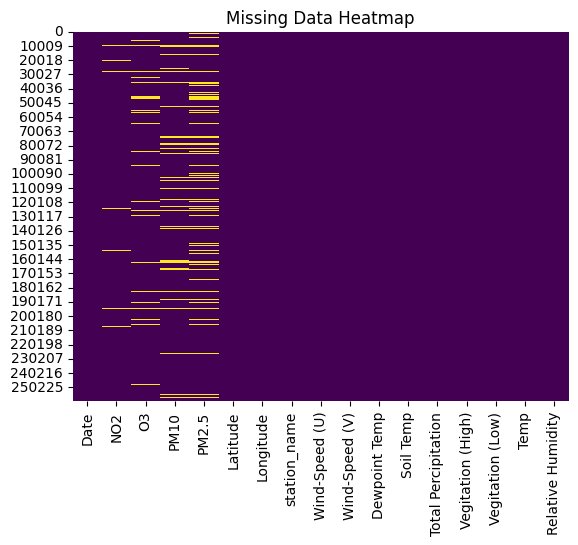

In [10]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [11]:
# Function to fill missing values with upper 3 and down 3 values mean for df1
def fill_missing_values(df1, column):
    for i in range(len(df1)):
        if pd.isna(df1[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df1[column][i - j]):
                    up_sum += df1[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df1):
                if not pd.isna(df1[column][i + k]):
                    down_sum += df1[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df1.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['NO2', 'O3', 'PM10', 'PM2.5']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df1, column)

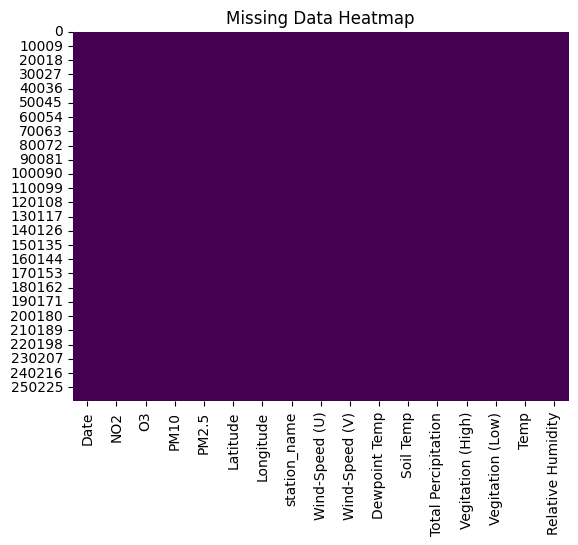

In [12]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

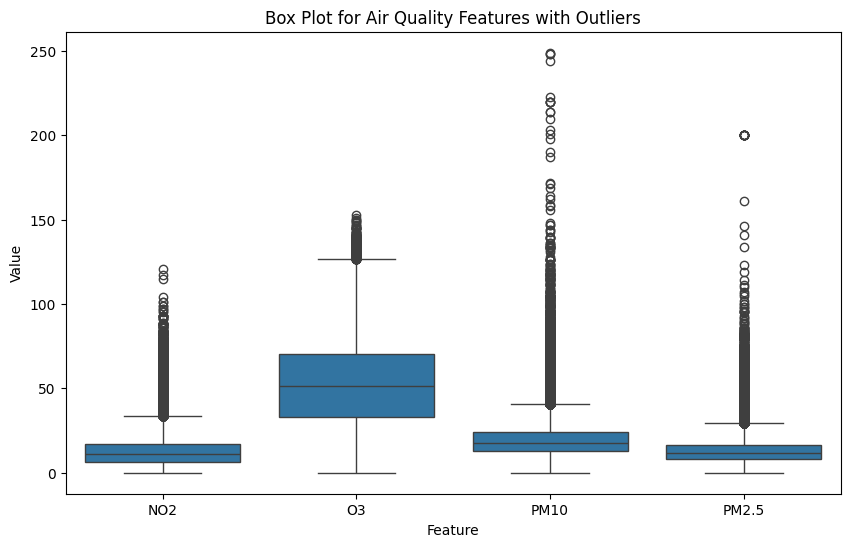

In [13]:
# Melt the DataFrame to long format
df_melted = df1.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity'],
                     value_vars=['NO2', 'O3', 'PM10', 'PM2.5'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269198 entries, 0 to 269197
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 269198 non-null  datetime64[ns]
 1   NO2                  248165 non-null  float64       
 2   O3                   248117 non-null  float64       
 3   PM10                 269198 non-null  float64       
 4   PM2.5                269198 non-null  float64       
 5   Latitude             269198 non-null  float64       
 6   Longitude            269198 non-null  float64       
 7   station_name         269198 non-null  object        
 8   Wind-Speed (U)       269198 non-null  float64       
 9   Wind-Speed (V)       269198 non-null  float64       
 10  Dewpoint Temp        269198 non-null  float64       
 11  Soil Temp            269198 non-null  float64       
 12  Total Percipitation  269198 non-null  float64       
 13  Vegitation (Hi

In [15]:
# checking Null values in dataframe 2
df2.isnull().sum().sort_values(ascending=True)

Date                       0
PM10                       0
Latitude                   0
PM2.5                      0
Longitude                  0
station_name               0
Wind-Speed (V)             0
Wind-Speed (U)             0
Total Percipitation        0
Vegitation (High)          0
Dewpoint Temp              0
Soil Temp                  0
Vegitation (Low)           0
Temp                       0
Relative Humidity          0
NO2                    21033
O3                     21081
dtype: int64

In [16]:
# Function to fill missing values with upper 3 and down 3 values mean of df2
def fill_missing_values(df2, column):
    for i in range(len(df2)):
        if pd.isna(df2[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df2[column][i - j]):
                    up_sum += df2[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df2):
                if not pd.isna(df2[column][i + k]):
                    down_sum += df2[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df2.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['Temp', 'Vegitation (Low)', 'Vegitation (High)', 'Total Percipitation',
    'Soil Temp', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp','Relative Humidity', 'NO2', 'O3']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df2, column)

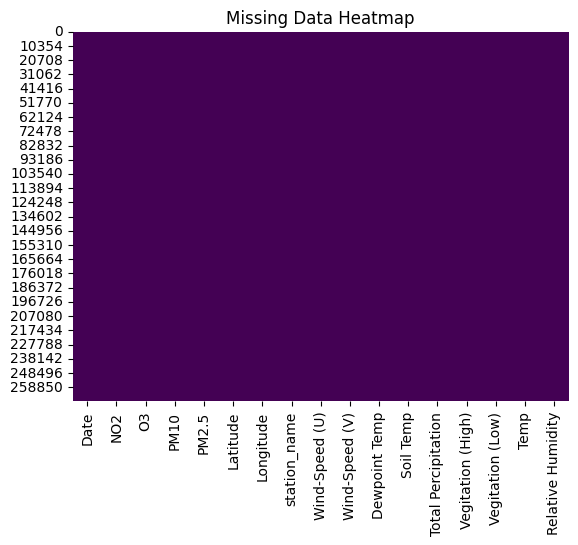

In [17]:
# Visualize missing data (optional)
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

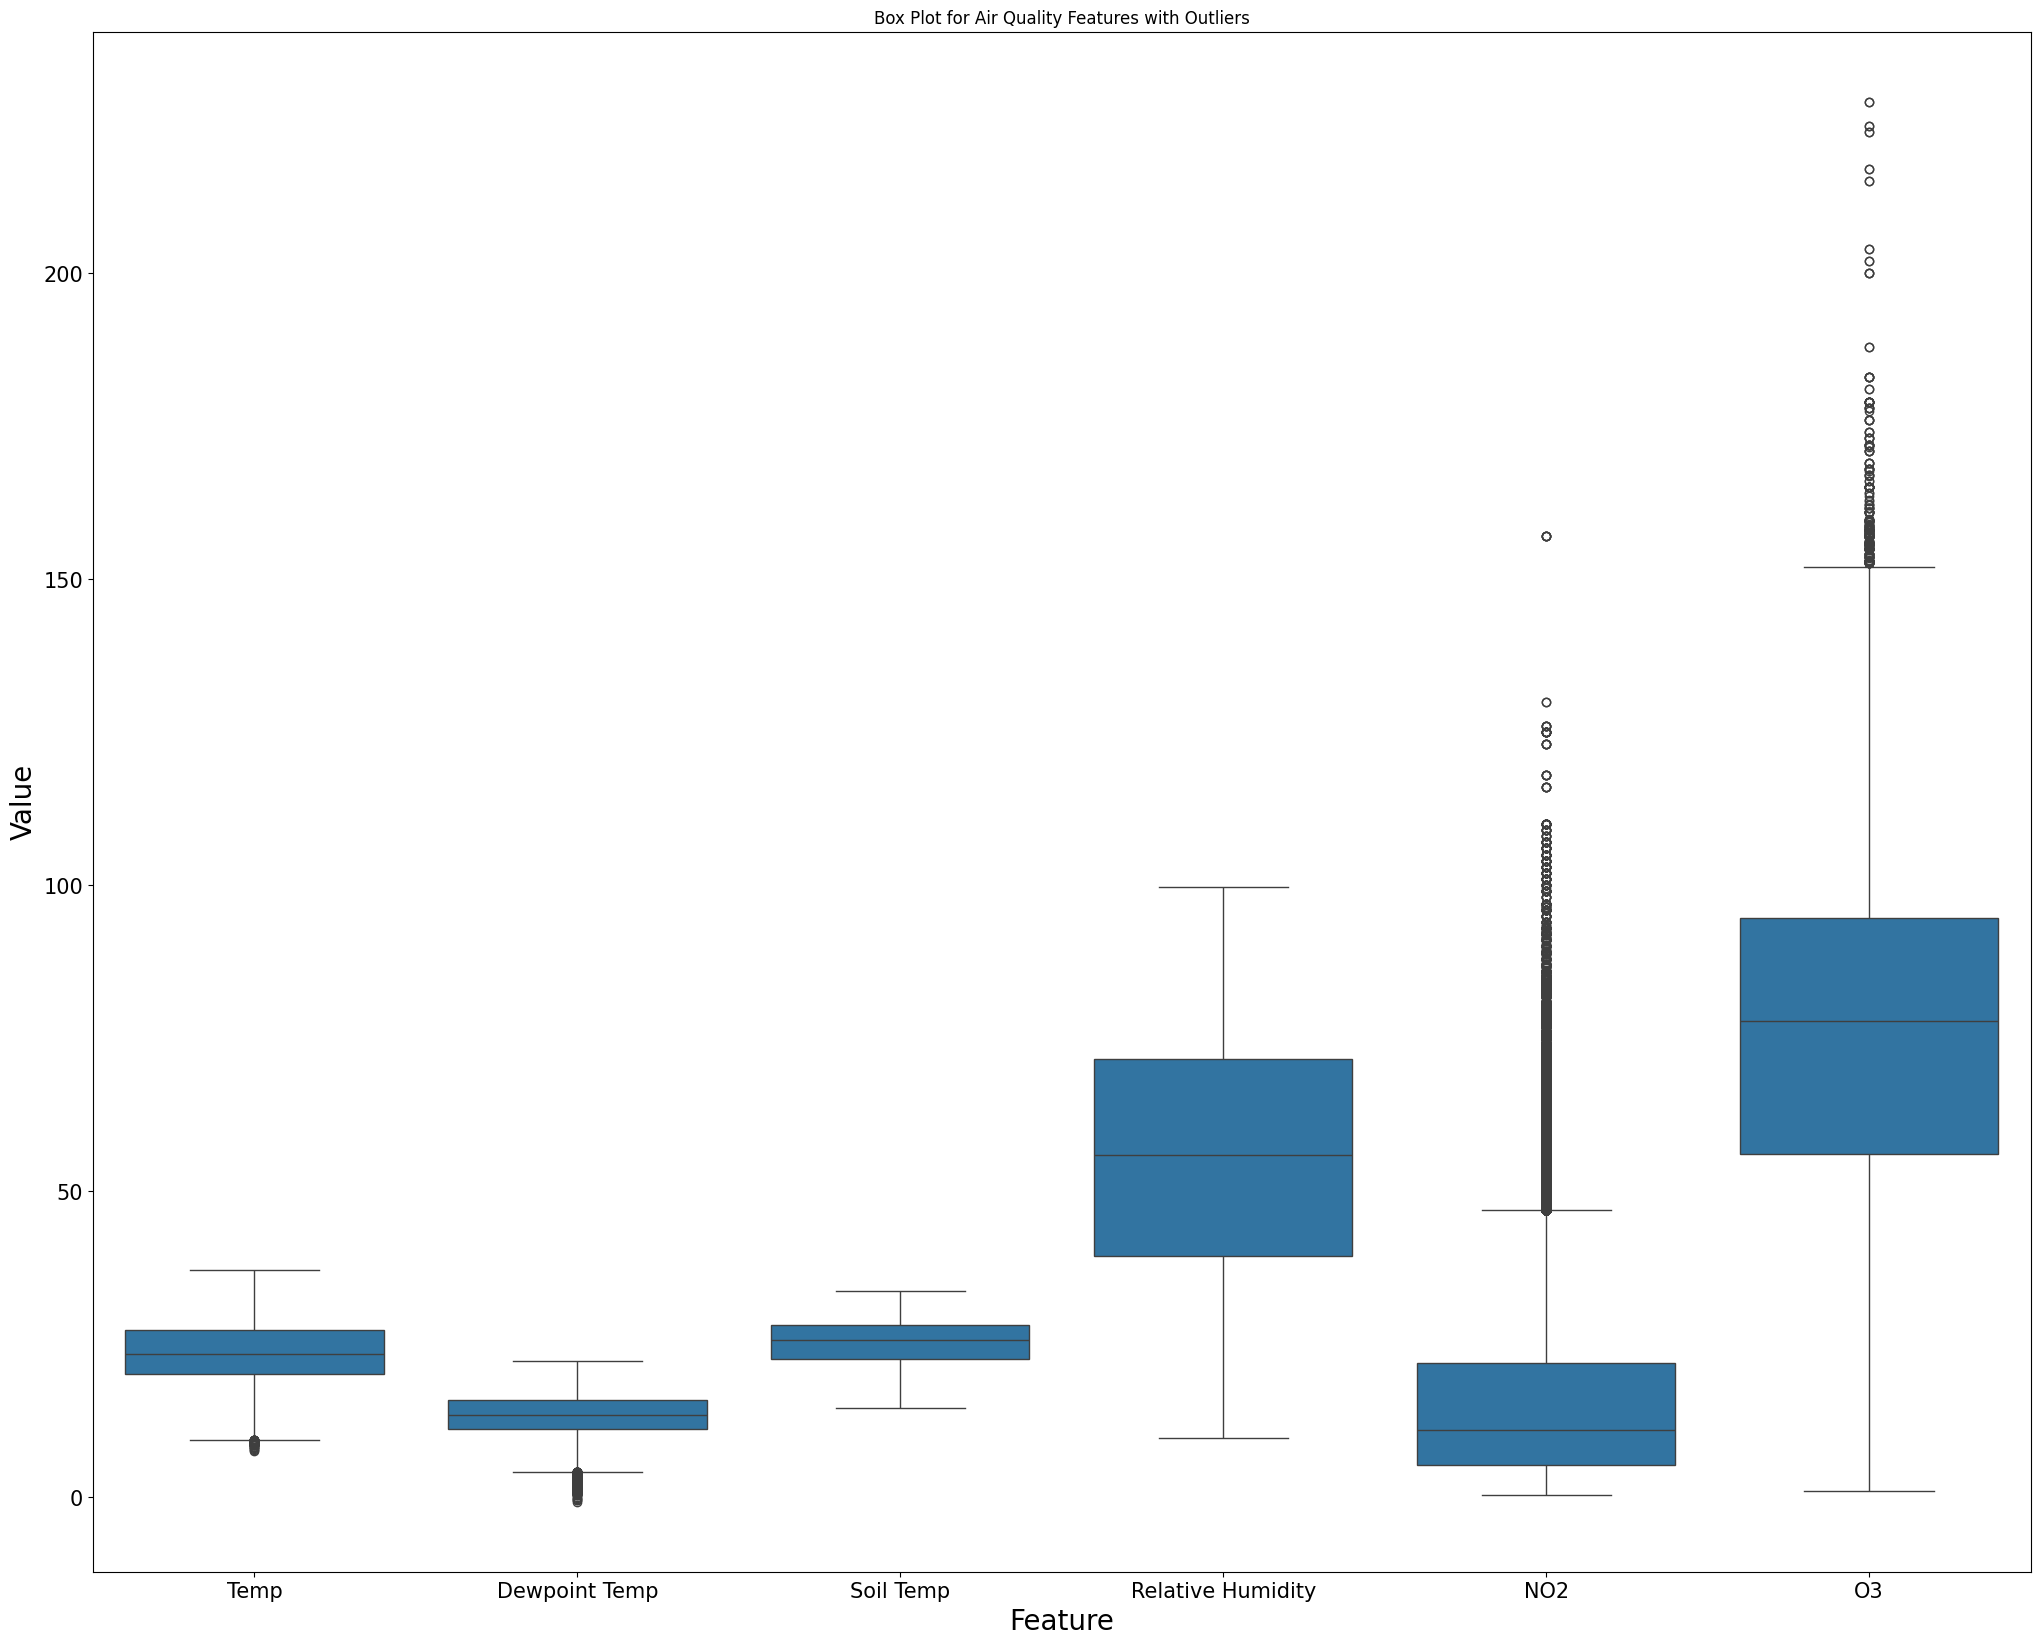

In [18]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'NO2', 'O3'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

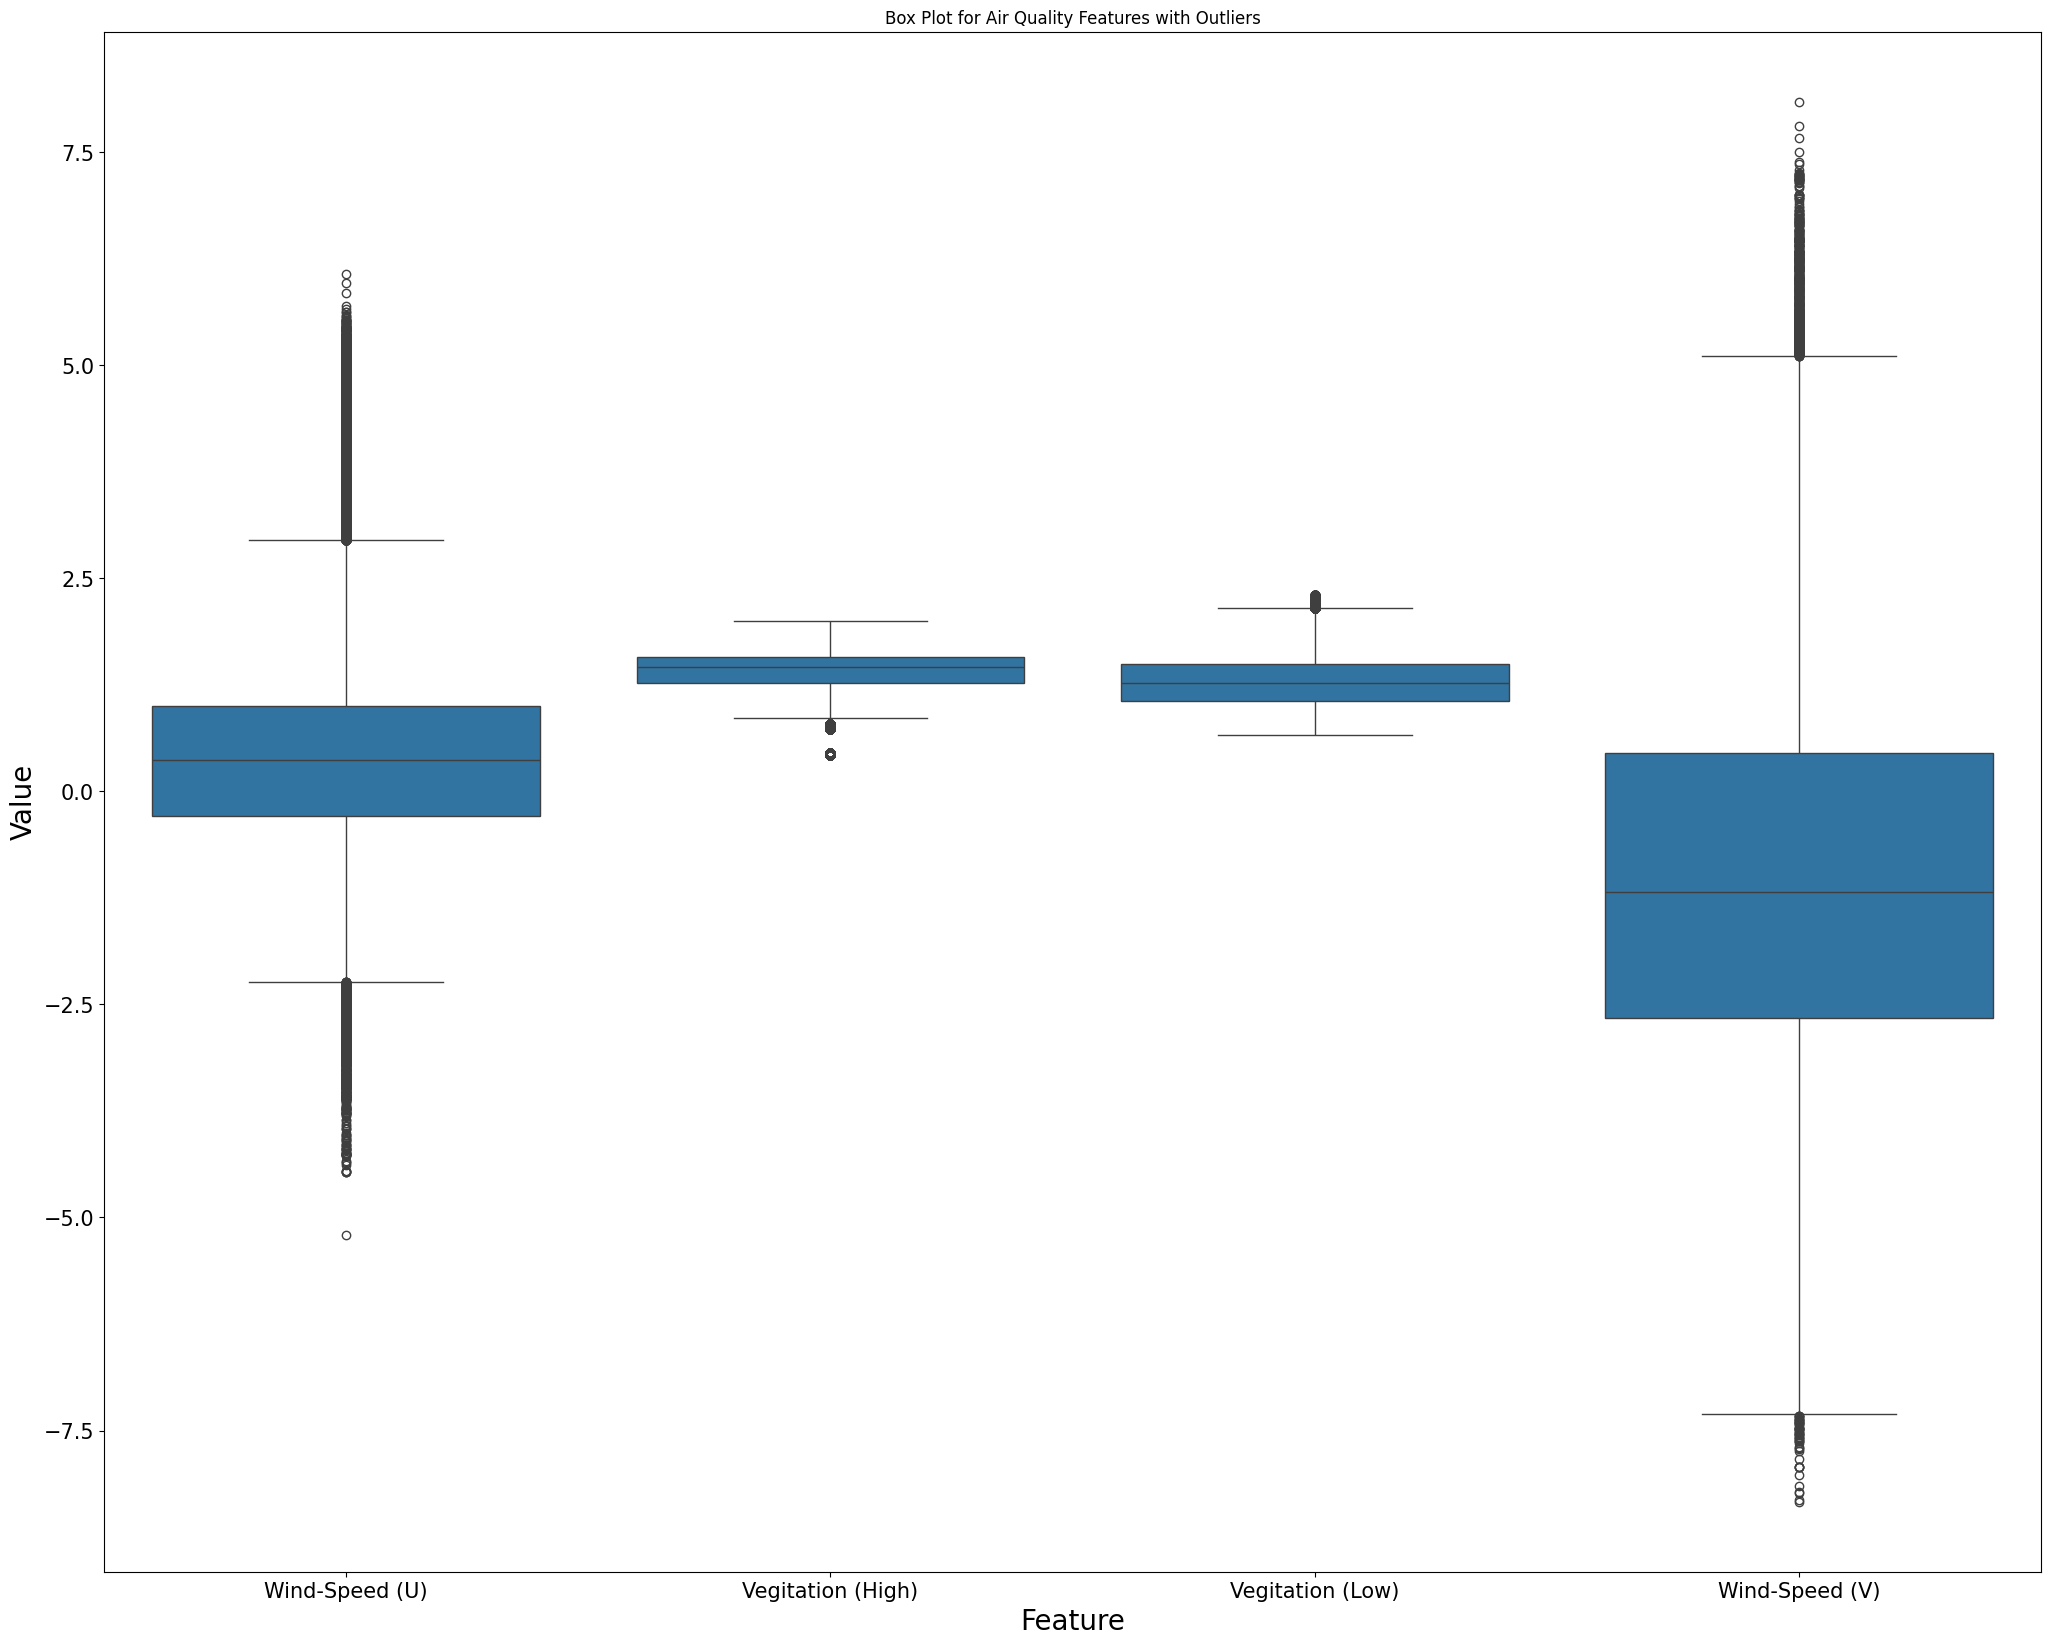

In [19]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Wind-Speed (U)', 'Vegitation (High)', 'Vegitation (Low)', 'Wind-Speed (V)'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

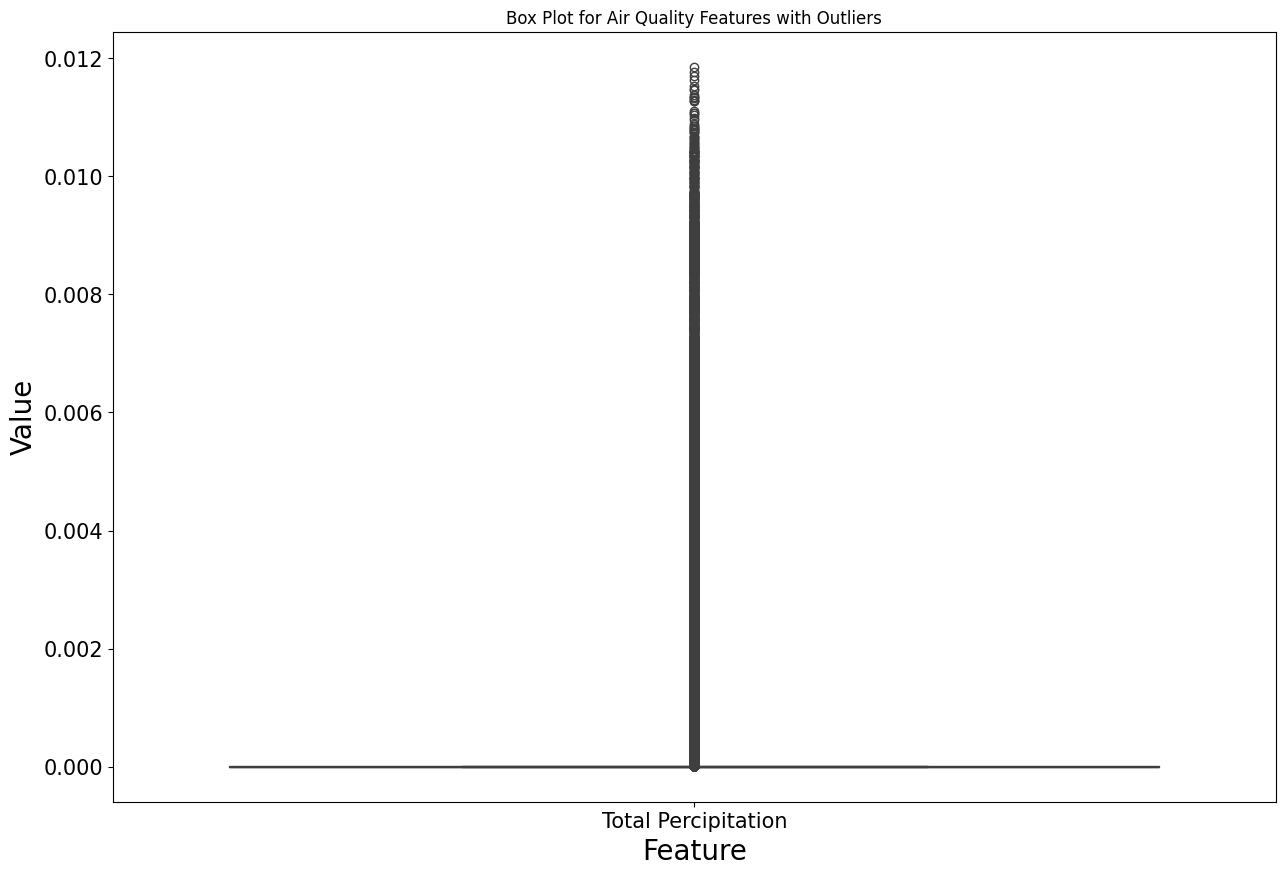

In [20]:

# Melt the DataFrame to long format
df_melted = df2.melt(value_vars=['Total Percipitation'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [21]:
df = pd.concat([df1, df2])

In [22]:
# Sorting the DataFrame by the 'Date' column
df = df.sort_values(by='Date').reset_index(drop=True)


df

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,12.666270,70.821640,12.985242,10.683514,38.053745,23.741959,PANACEA_037,1.746621,-0.769832,9.913217,17.521659,0.000045,1.464838,1.521435,13.075840,81.255272
1,2020-05-01 00:00:00,51.526194,44.427708,14.538260,11.451291,38.040443,23.833649,ATHENS_01,1.726030,-0.735917,9.740093,17.569076,0.000047,1.597551,1.287751,13.523624,77.993012
2,2020-05-01 00:00:00,48.280560,43.551853,12.000000,13.000000,37.982040,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745
3,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.993450,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092
4,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.973120,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529405,2023-01-06 20:00:00,17.309504,30.477169,19.316330,18.329060,43.550000,13.550000,Ancona CAMS Station 9,-0.486876,-0.994703,56.154145,55.689513,0.000002,2.736540,2.582130,56.884544,95.018199
529406,2023-01-06 20:00:00,15.000000,27.000000,16.000000,19.000000,43.633761,13.388042,Falconara Scuola,-0.487506,-0.994299,56.716054,56.257343,0.000002,2.737874,2.584349,57.444342,95.031141
529407,2023-01-06 20:00:00,19.301353,27.537348,22.967411,23.497248,43.550000,13.250000,Ancona CAMS Station 6,-0.488296,-0.993532,57.490882,57.034891,0.000002,2.734879,2.587515,58.217152,95.042870
529408,2023-01-06 20:00:00,16.185026,27.716803,23.316715,21.338976,43.550000,13.150000,Ancona CAMS Station 5,-0.488739,-0.993209,57.883527,57.430750,0.000002,2.734949,2.589083,58.608489,95.050778


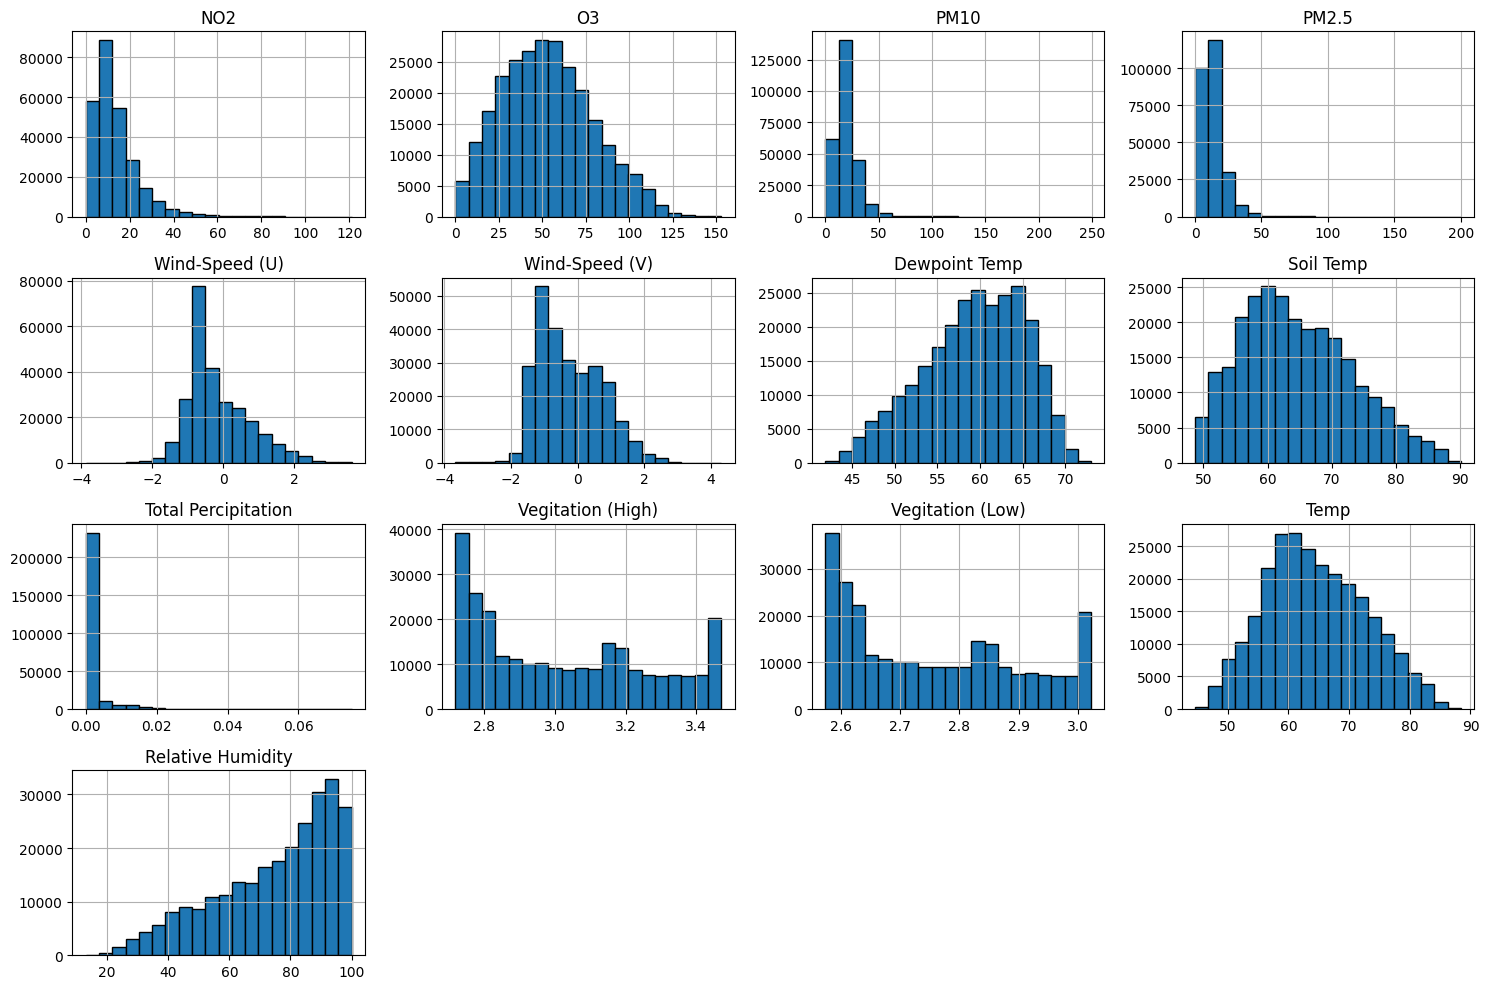

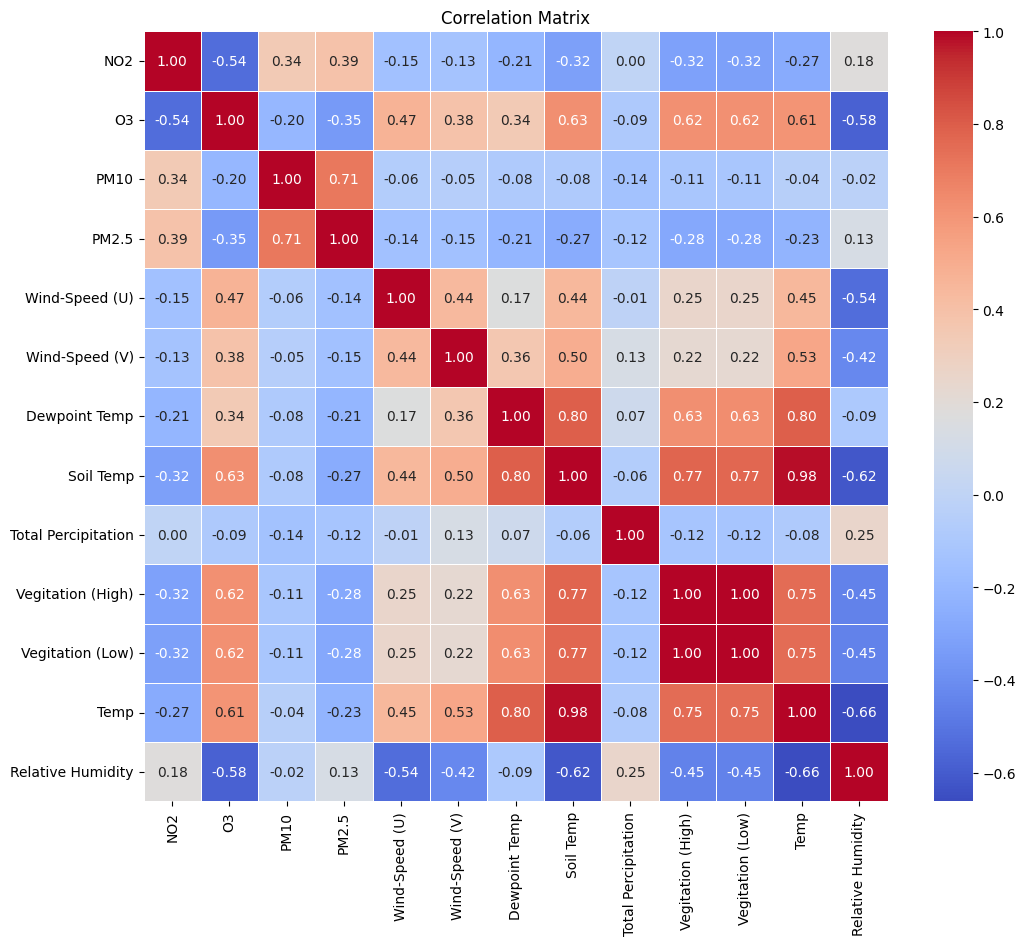

In [23]:
# Convert the 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df1[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Generate and plot the correlation matrix

correlation_matrix = df1[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Convert the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Set the 'Date' column as the index
df2.set_index('Date', inplace=True)



In [25]:
df_vis = df2

# Ensure all numerical columns are converted to numeric types where necessary
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df_vis[numerical_columns] = df_vis[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Resample the data to daily averages for numerical columns only
daily_data = df_vis[numerical_columns].resample('D').mean()



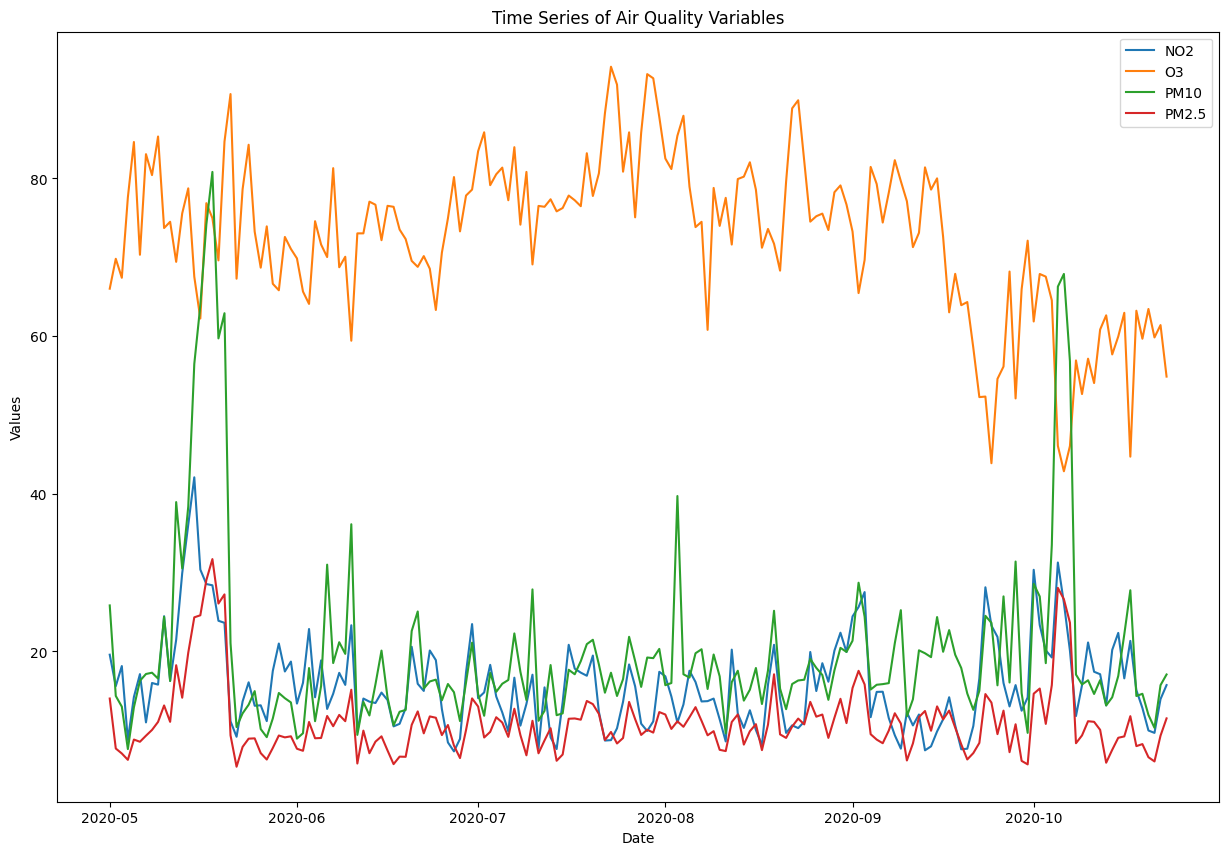

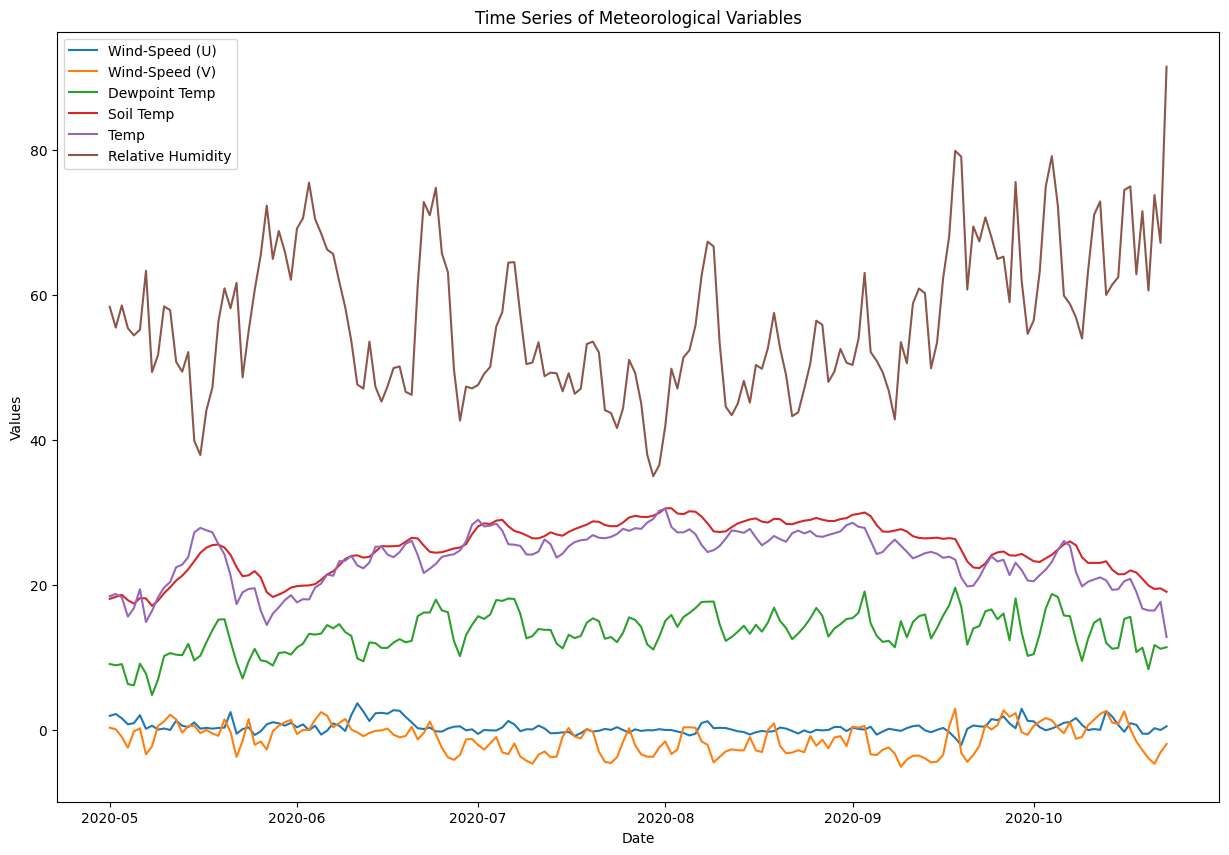

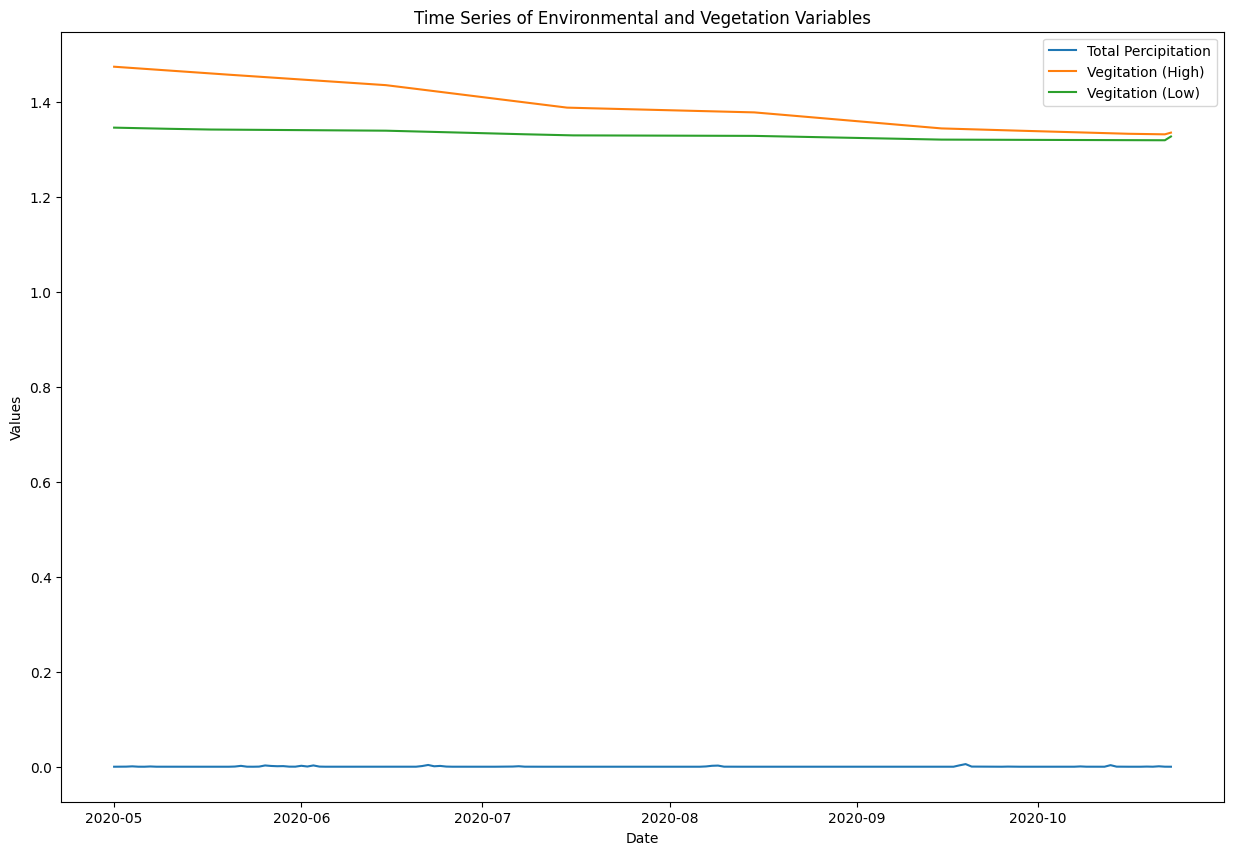

In [26]:
# Plot 1: Time Series Plot for Air Quality Variables
air_quality_vars = ['NO2', 'O3', 'PM10', 'PM2.5']

plt.figure(figsize=(15, 10))
for column in air_quality_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Air Quality Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 2: Time Series Plot for Meteorological Variables
meteorological_vars = ['Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Temp', 'Relative Humidity']

plt.figure(figsize=(15, 10))
for column in meteorological_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Meteorological Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 3: Time Series Plot for Environmental and Vegetation Variables
environmental_vars = ['Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']

plt.figure(figsize=(15, 10))
for column in environmental_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Environmental and Vegetation Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

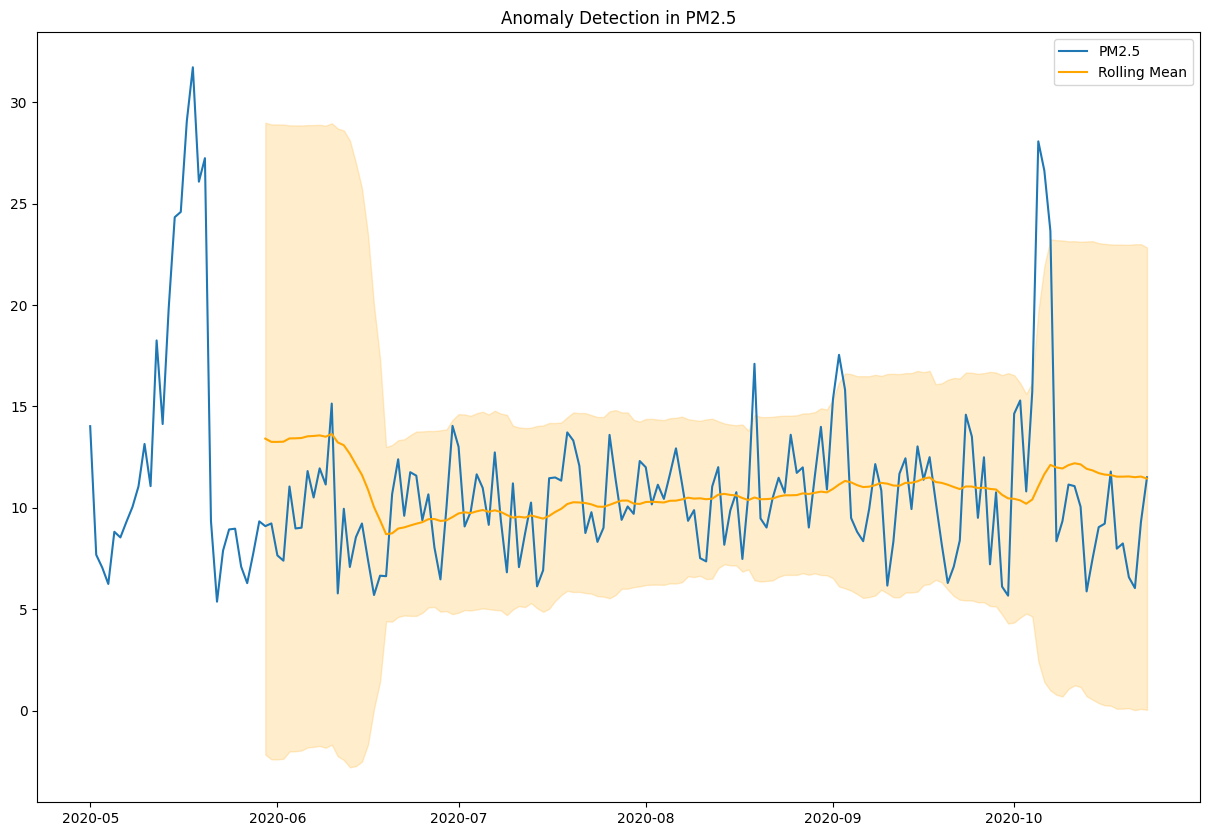

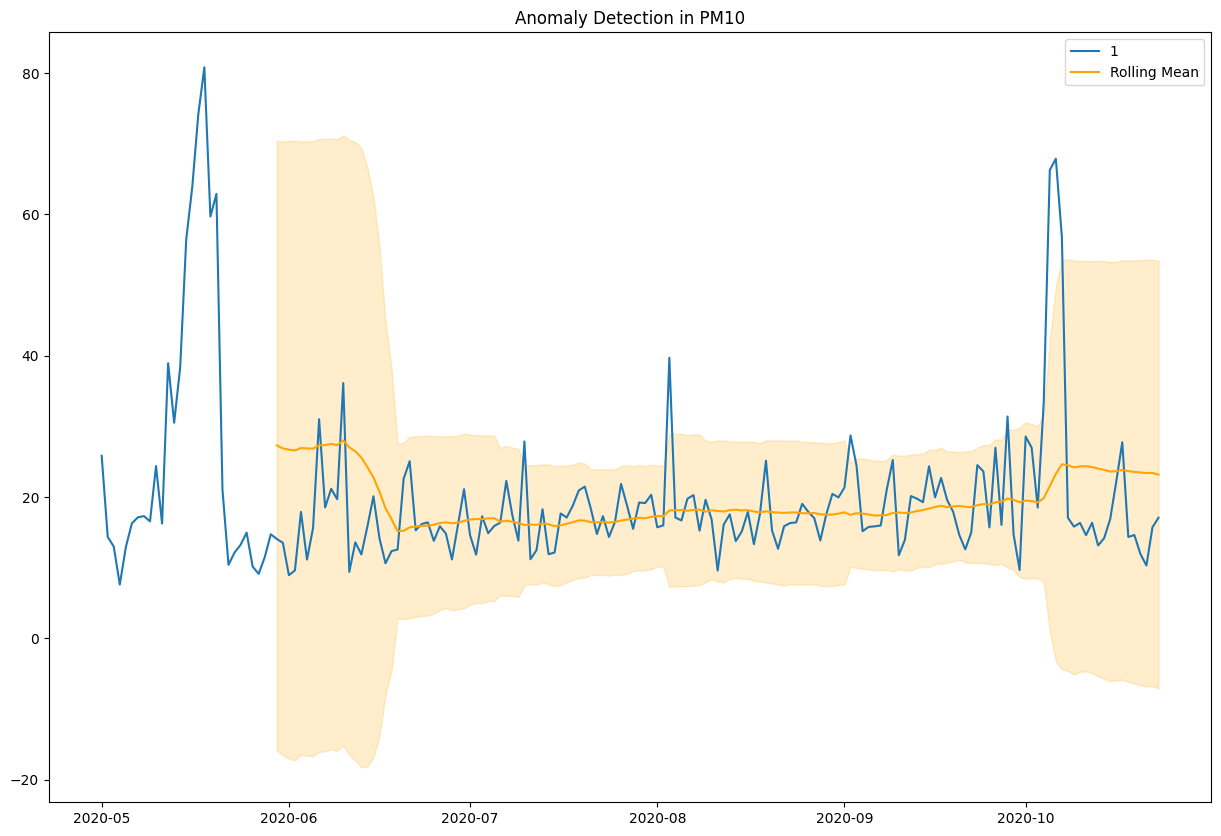

In [27]:
rolling_mean = daily_data.rolling(window=30).mean()
rolling_std = daily_data.rolling(window=30).std()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM2.5'], label='PM2.5')
plt.plot(rolling_mean.index, rolling_mean['PM2.5'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM2.5'] - (2 * rolling_std['PM2.5']), rolling_mean['PM2.5'] + (2 * rolling_std['PM2.5']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM2.5')
plt.show()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM10'], label='1')
plt.plot(rolling_mean.index, rolling_mean['PM10'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM10'] - (2 * rolling_std['PM10']), rolling_mean['PM10'] + (2 * rolling_std['PM10']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM10')
plt.show()

In [28]:
# Define breakpoints for each pollutant
breakpoints = {
    'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
    'O3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150),
           (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)]
}

# Function to calculate sub-index for a given pollutant
def calc_sub_index(concentration, breakpoints):
    for (C_lo, C_hi, I_lo, I_hi) in breakpoints:
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return np.nan

# Function to calculate AQI from pollutant concentrations
def calculate_aqi(row):
    sub_indices = []
    for pollutant in ['PM2.5', 'PM10', 'NO2', 'O3']:
        sub_index = calc_sub_index(row[pollutant], breakpoints[pollutant])
        sub_indices.append(sub_index)
    return max(sub_indices)

# Calculate AQI for each row
df2['AQI'] = df2.apply(calculate_aqi, axis=1)

In [29]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI
Date,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379


In [30]:
# Add a new column to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df2['AQI_Category'] = df2['AQI'].apply(categorize_aqi)

In [31]:
# Mapping AQI Categories to Numerical Values
aqi_category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4
}

# Adding a new column with numerical AQI values
df2['AQI_Numerical'] = df2['AQI_Category'].map(aqi_category_mapping)

In [32]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
Date,,,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1


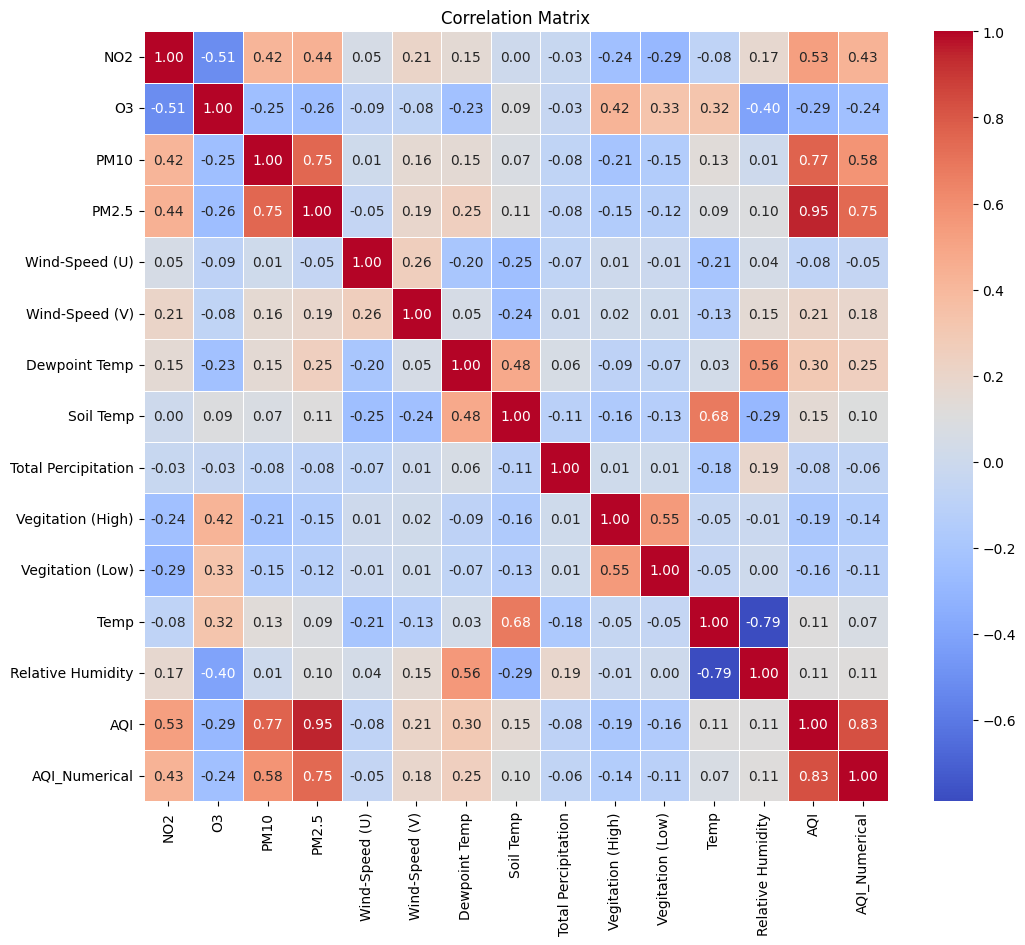

In [33]:
# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity','AQI', 'AQI_Numerical']


# Generate and plot the correlation matrix
correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269198 entries, 2020-05-01 00:00:00 to 2020-10-23 06:00:00
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NO2                  269198 non-null  float64
 1   O3                   269198 non-null  float64
 2   PM10                 269198 non-null  float64
 3   PM2.5                269198 non-null  float64
 4   Latitude             269198 non-null  float64
 5   Longitude            269198 non-null  float64
 6   station_name         269198 non-null  object 
 7   Wind-Speed (U)       269198 non-null  float64
 8   Wind-Speed (V)       269198 non-null  float64
 9   Dewpoint Temp        269198 non-null  float64
 10  Soil Temp            269198 non-null  float64
 11  Total Percipitation  269198 non-null  float64
 12  Vegitation (High)    269198 non-null  float64
 13  Vegitation (Low)     269198 non-null  float64
 14  Temp                 269198 non-nu

In [37]:
df2.to_csv('/content/aqi_data.csv', index=True)

##IMPORTING

In [38]:
# prompt: import data from aqi_data.csv and store it in 'data' dataframe

import pandas as pd
data = pd.read_csv('/content/aqi_data.csv')


In [39]:
data

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.150,23.550,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,3.490439e-05,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
1,2020-05-01 00:00:00,17.563843,74.391100,10.520411,7.836725,37.850,23.750,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,3.718065e-05,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2,2020-05-01 00:00:00,2.892315,74.565690,8.587352,6.306404,38.150,23.650,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,4.022447e-05,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
3,2020-05-01 00:00:00,17.196804,67.904120,10.917974,8.207660,37.850,23.850,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,3.551249e-05,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
4,2020-05-01 00:00:00,15.817172,67.634710,11.353168,8.217451,37.850,23.950,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,3.642373e-05,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269193,2020-10-23 06:00:00,44.000000,4.000000,31.000000,21.000000,37.988,23.728,ARISTOTELOUS,0.613994,-1.747142,12.088197,19.276968,1.894294e-08,0.865515,0.938199,13.608689,90.581936,69.716738,Moderate,2
269194,2020-10-23 06:00:00,5.032351,66.132935,13.737181,9.527579,38.150,23.950,Athens CAMS station 14,0.664862,-1.272373,11.630839,17.768288,2.153593e-08,1.342649,1.095272,12.977829,91.585501,39.698246,Good,1
269195,2020-10-23 06:00:00,6.826980,64.451965,14.126643,10.674686,38.150,23.850,Athens CAMS station 13,0.650894,-1.267934,11.353611,17.557254,2.706038e-08,1.341997,1.505336,12.616255,92.067290,44.477858,Good,1
269196,2020-10-23 06:00:00,26.725761,46.044590,16.971685,13.495555,37.850,23.650,Athens CAMS station 8,0.652820,-1.558585,11.765394,18.422150,5.913158e-08,1.556196,1.479650,13.451869,89.671033,53.934858,Moderate,2


In [40]:
data.isnull().sum()

Date                      0
NO2                       0
O3                        0
PM10                      0
PM2.5                     0
Latitude                  0
Longitude                 0
station_name              0
Wind-Speed (U)            0
Wind-Speed (V)            0
Dewpoint Temp             0
Soil Temp                 0
Total Percipitation       0
Vegitation (High)         0
Vegitation (Low)          0
Temp                      0
Relative Humidity         0
AQI                    1033
AQI_Category              0
AQI_Numerical             0
dtype: int64

In [41]:
# prompt: display the dataset as a dataframe in descending order with latest date in the first row

data_sorted = data.sort_values(by='Date', ascending=True)
display(data_sorted)


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,3.490439e-05,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
34,2020-05-01 00:00:00,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,4.418383e-05,1.471124,0.785802,14.188421,76.102745,52.892704,Moderate,2
35,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,4.198788e-05,1.236699,1.078760,13.838998,80.047092,189.983140,Very Unhealthy,4
36,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,4.085640e-05,1.007595,0.998724,13.896932,81.434787,189.983140,Very Unhealthy,4
37,2020-05-01 00:00:00,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,4.088085e-05,1.394497,1.133403,13.940105,79.207020,43.622113,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269186,2020-10-23 06:00:00,7.217849,63.738625,14.129429,10.600691,38.15000,23.750000,Athens CAMS station 12,0.605096,-1.264266,11.003220,17.330797,9.271122e-08,1.370823,2.066804,12.208093,92.397380,44.169546,Good,1
269185,2020-10-23 06:00:00,1.000000,74.000000,9.000000,5.000000,38.14400,23.758000,THRAKOMAKEDONES,0.603320,-1.279962,11.030122,17.378329,7.319031e-08,1.377945,1.989921,12.253463,92.286555,20.833333,Good,1
269184,2020-10-23 06:00:00,19.836054,50.438133,18.525358,12.565454,37.95000,23.850000,Athens CAMS station 5,0.661919,-1.851986,11.901337,18.851289,1.885169e-08,1.565204,1.425232,14.030698,87.120588,51.978853,Moderate,2
269189,2020-10-23 06:00:00,8.046932,59.522320,13.313768,10.041380,38.15000,23.550000,Athens CAMS station 0,0.537165,-1.185914,11.129469,17.286123,1.692280e-07,1.485542,2.215322,12.358017,92.255645,41.839083,Good,1


###BUILDING THE MODEL

####FITTING AND FORECASTING

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 18.70311172283507
MSE: 349.8063881168507
MAE: 12.987175981787749


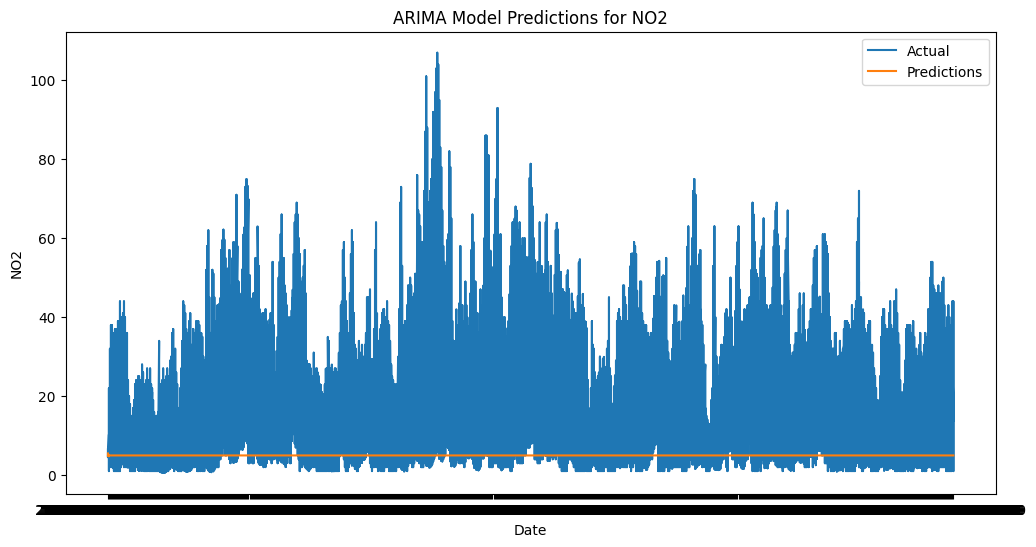

In [42]:
# prompt: split the dataset into 80:30 for training and testing respectively. Then use NO2 column from the training set and train the ARIMA model. After training use the testing set to predict the NO2 values for the respective dates.
!pip install statsmodels
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extract the NO2 column from the training set
train_no2 = train_data['NO2']

# Fit the ARIMA model
# (p, d, q) are the order of the model
# You may need to tune these parameters
model = ARIMA(train_no2, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_no2), end=len(data_sorted)-1)

# Evaluate the model
org_NO2_rmse = mean_squared_error(test_data['NO2'], predictions, squared=False)
org_NO2_mse = mean_squared_error(test_data['NO2'], predictions)
org_NO2_mae= mean_absolute_error(test_data['NO2'], predictions)

print('RMSE:', org_NO2_rmse)
print('MSE:', org_NO2_mse)
print('MAE:', org_NO2_mae)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['NO2'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for NO2')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.legend()
plt.show()


In [43]:
print("Predicted values:\n", predictions[:5])
print("Actual values:", test_data['NO2'].values[:5])

Predicted values:
 215358    5.477178
215359    4.834831
215360    4.813777
215361    4.774937
215362    4.983177
Name: predicted_mean, dtype: float64
Actual values: [ 6.5008707  4.5127363 10.273359   6.         6.       ]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 27.014244806947698


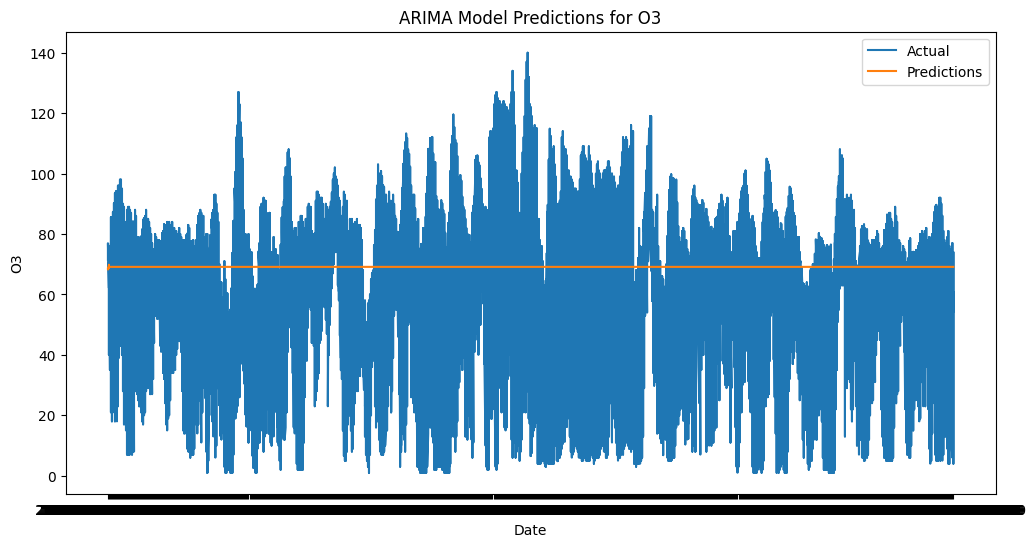

In [44]:
# prompt: similarly do it for O3 column

# Extract the O3 column from the training set
train_o3 = train_data['O3']

# Fit the ARIMA model
# (p, d, q) are the order of the model
# You may need to tune these parameters
model = ARIMA(train_o3, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_o3), end=len(data_sorted)-1)

# Evaluate the model
rmse = mean_squared_error(test_data['O3'], predictions, squared=False)
print('RMSE:', rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['O3'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for O3')
plt.xlabel('Date')
plt.ylabel('O3')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 21.75014219810843


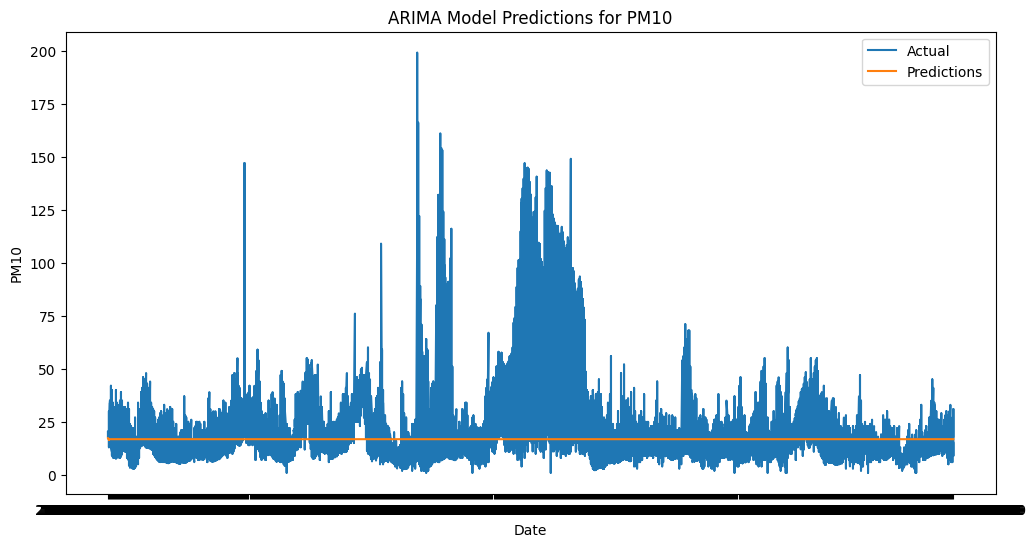

In [45]:
# prompt: similarly do it for PM10 column

# Extract the PM10 column from the training set
train_pm10 = train_data['PM10']

# Fit the ARIMA model
# (p, d, q) are the order of the model
# You may need to tune these parameters
model = ARIMA(train_pm10, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm10), end=len(data_sorted)-1)

# Evaluate the model
rmse = mean_squared_error(test_data['PM10'], predictions, squared=False)
print('RMSE:', rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM10'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM10')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 8.150569620440551


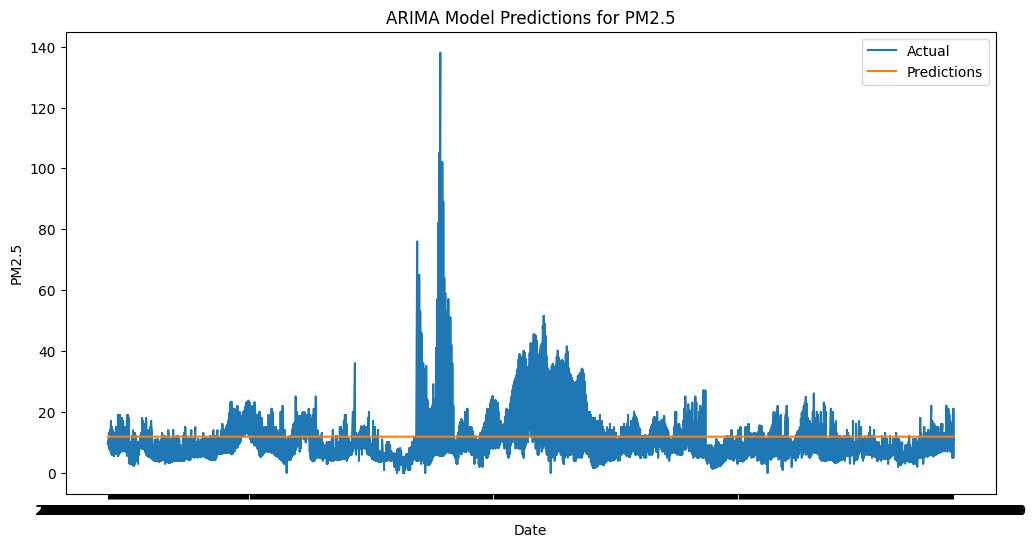

In [46]:
# prompt: similarly do it for PM2.5 column

# Extract the PM2.5 column from the training set
train_pm25 = train_data['PM2.5']

# Fit the ARIMA model
# (p, d, q) are the order of the model
# You may need to tune these parameters
model = ARIMA(train_pm25, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm25), end=len(data_sorted)-1)

# Evaluate the model
rmse = mean_squared_error(test_data['PM2.5'], predictions, squared=False)
print('RMSE:', rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM2.5'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()


In [47]:
# prompt: print the first 5 predicted values of PM2.5 and the actual values of PM2.5

print("Predicted values:", predictions[:5])
print("Actual values:", test_data['PM2.5'].values[:5])


Predicted values: 215358    11.747927
215359    11.866254
215360    11.846195
215361    11.775617
215362    11.810154
Name: predicted_mean, dtype: float64
Actual values: [ 9.998291  9.333749 10.898197 10.898197 11.056896]


###FORECASTING

In [48]:
# prompt: import data from aqi_data.csv and store it in 'data' dataframe

import pandas as pd
data1 = pd.read_csv("C://Users//shlok//Desktop//first year//Second Semester//Introduction to Artificial Intelligence- Bhavik Gandhi//CleanData_Project.csv")


In [49]:
# Convert the 'Date' column to datetime and set it as index
data1['Date'] = pd.to_datetime(data1['Date']) # Convert 'Date' column to datetime
data1.set_index('Date', inplace=True)

# Resample data to daily average (if data is in hourly format)
no2_data = data1['NO2'].resample('D').mean()

# Fit the ARIMA model to NO2 data
arima_model = ARIMA(no2_data, order=(5,1,0))
arima_result = arima_model.fit()

# Forecast future values
forecast_steps = 60  # Forecast for the next 60 days
forecast = arima_result.forecast(steps=forecast_steps)

forecast.head()

2020-08-16    11.291236
2020-08-17    14.665360
2020-08-18    12.520906
2020-08-19    12.000100
2020-08-20    12.861525
Freq: D, Name: predicted_mean, dtype: float64

In [50]:

o3_data = data1['O3'].resample('D').mean()


arima_model_o3 = ARIMA(o3_data, order=(5,1,0))
arima_result_o3 = arima_model_o3.fit()


forecast_o3_steps = 60  # Forecast for the next 60 days
forecast_o3 = arima_result_o3.forecast(steps=forecast_o3_steps)

forecast_o3.head(30)


2020-08-16    75.050150
2020-08-17    76.735603
2020-08-18    75.314652
2020-08-19    75.674189
2020-08-20    76.560612
2020-08-21    75.765212
2020-08-22    75.661027
2020-08-23    76.012319
2020-08-24    75.891702
2020-08-25    75.788624
2020-08-26    75.947353
2020-08-27    75.907516
2020-08-28    75.848675
2020-08-29    75.890149
2020-08-30    75.898918
2020-08-31    75.870630
2020-09-01    75.885655
2020-09-02    75.891315
2020-09-03    75.881379
2020-09-04    75.882803
2020-09-05    75.887464
2020-09-06    75.883669
2020-09-07    75.883761
2020-09-08    75.885536
2020-09-09    75.884678
2020-09-10    75.884104
2020-09-11    75.884934
2020-09-12    75.884698
2020-09-13    75.884446
2020-09-14    75.884682
Freq: D, Name: predicted_mean, dtype: float64

In [51]:

pm25_data = data1['PM2.5'].resample('D').mean()

# Fit the ARIMA model to PM2.5 data
arima_model_pm25 = ARIMA(pm25_data, order=(5,1,0))
arima_result_pm25 = arima_model_pm25.fit()

forecast_pm25_steps = 60  # Forecast for the next 60 days
forecast_pm25 = arima_result_pm25.forecast(steps=forecast_pm25_steps)

forecast_pm25.head()


2020-08-16    7.941112
2020-08-17    7.540020
2020-08-18    8.176547
2020-08-19    8.255161
2020-08-20    8.309845
Freq: D, Name: predicted_mean, dtype: float64

In [52]:

pm10_data = data1['PM10'].resample('D').mean()

# Fitting the ARIMA model to PM10 data
arima_model_pm10 = ARIMA(pm10_data, order=(5,1,0))
arima_result_pm10 = arima_model_pm10.fit()

# Forecastiung future values for PM10
forecast_pm10_steps = 60  # Forecast for the next 60 days
forecast_pm10 = arima_result_pm10.forecast(steps=forecast_pm10_steps)


forecast_pm10.head()


2020-08-16    12.594483
2020-08-17    11.082299
2020-08-18    11.379399
2020-08-19    11.873914
2020-08-20    11.798997
Freq: D, Name: predicted_mean, dtype: float64

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generating in-sample predictions for NO2
no2_predictions = arima_result.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculating MAE, MSE, and RMSE for NO2
mae_no2 = mean_absolute_error(no2_data, no2_predictions)
mse_no2 = mean_squared_error(no2_data, no2_predictions)
rmse_no2 = np.sqrt(mse_no2)

(mae_no2, mse_no2, rmse_no2)


(3.8619435028206928, 24.95299508540652, 4.995297296999101)

In [54]:
# Generating in-sample predictions for O3
o3_predictions = arima_result_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])

# Calculating MAE, MSE, and RMSE for O3
mae_o3 = mean_absolute_error(o3_data, o3_predictions)
mse_o3 = mean_squared_error(o3_data, o3_predictions)
rmse_o3 = np.sqrt(mse_o3)


pm25_predictions = arima_result_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])


mae_pm25 = mean_absolute_error(pm25_data, pm25_predictions)
mse_pm25 = mean_squared_error(pm25_data, pm25_predictions)
rmse_pm25 = np.sqrt(mse_pm25)


pm10_predictions = arima_result_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])


mae_pm10 = mean_absolute_error(pm10_data, pm10_predictions)
mse_pm10 = mean_squared_error(pm10_data, pm10_predictions)
rmse_pm10 = np.sqrt(mse_pm10)

(mae_o3, mse_o3, rmse_o3), (mae_pm25, mse_pm25, rmse_pm25), (mae_pm10, mse_pm10, rmse_pm10)


((5.5598570922491595, 78.3448780323072, 8.851264205315939),
 (2.317303168736076, 11.404854775779961, 3.377107456948914),
 (5.770086090476001, 74.6287985052119, 8.638796125920088))

###OPTIMISING THE MODEL

In [55]:
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

def optimize_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(data, order=(p, d, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, d, q)
                best_model = model
        except:
            continue
    return best_order, best_model

# Define the range of parameters
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)




In [56]:
# Optimizzing ARIMA parameters for NO2
best_order_no2, best_model_no2 = optimize_arima(no2_data, p_values, d_values, q_values)

best_order_no2, best_model_no2.aic

# Fitting the ARIMA model with the optimal parameters for NO2
optimized_arima_model_no2 = ARIMA(no2_data, order=best_order_no2).fit()

# Generating in-sample predictions for NO2 using the optimized model
optimized_no2_predictions = optimized_arima_model_no2.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculatiung MAE, MSE, and RMSE for the optimized NO2 model
optimized_mae_no2 = mean_absolute_error(no2_data, optimized_no2_predictions)
optimized_mse_no2 = mean_squared_error(no2_data, optimized_no2_predictions)
optimized_rmse_no2 = np.sqrt(optimized_mse_no2)

optimized_mae_no2, optimized_mse_no2, optimized_rmse_no2


(3.5428283865640218, 21.68274795504749, 4.656473768319487)

In [57]:

best_order_o3, best_model_o3 = optimize_arima(o3_data, p_values, d_values, q_values)

optimized_arima_model_o3 = ARIMA(o3_data, order=best_order_o3).fit()


optimized_o3_predictions = optimized_arima_model_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])


optimized_mae_o3 = mean_absolute_error(o3_data, optimized_o3_predictions)
optimized_mse_o3 = mean_squared_error(o3_data, optimized_o3_predictions)
optimized_rmse_o3 = np.sqrt(optimized_mse_o3)

best_order_o3, optimized_mae_o3, optimized_mse_o3, optimized_rmse_o3


((0, 1, 1), 5.553582633579233, 78.94340154249655, 8.88500993485638)

In [58]:
# Optimizing ARIMA parameters for PM2.5
best_order_pm25, best_model_pm25 = optimize_arima(pm25_data, p_values, d_values, q_values)

# Fitting the ARIMA model with the optimal parameters for PM2.5
optimized_arima_model_pm25 = ARIMA(pm25_data, order=best_order_pm25).fit()

# Generating in-sample predictions for PM2.5 using the optimized model
optimized_pm25_predictions = optimized_arima_model_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])

# Calculating MAE, MSE, and RMSE for the optimized PM2.5 model
optimized_mae_pm25 = mean_absolute_error(pm25_data, optimized_pm25_predictions)
optimized_mse_pm25 = mean_squared_error(pm25_data, optimized_pm25_predictions)
optimized_rmse_pm25 = np.sqrt(optimized_mse_pm25)

best_order_pm25, optimized_mae_pm25, optimized_mse_pm25, optimized_rmse_pm25


((1, 0, 0), 2.129472736286331, 9.031930158341572, 3.0053169813418306)

In [59]:
best_order_pm10, best_model_pm10 = optimize_arima(pm10_data, p_values, d_values, q_values)

optimized_arima_model_pm10 = ARIMA(pm10_data, order=best_order_pm10).fit()


optimized_pm10_predictions = optimized_arima_model_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])


optimized_mae_pm10 = mean_absolute_error(pm10_data, optimized_pm10_predictions)
optimized_mse_pm10 = mean_squared_error(pm10_data, optimized_pm10_predictions)
optimized_rmse_pm10 = np.sqrt(optimized_mse_pm10)

best_order_pm10, optimized_mae_pm10, optimized_mse_pm10, optimized_rmse_pm10


((2, 1, 3), 5.973823719318132, 69.64008431757716, 8.345063469954987)

###DISPLAYING THE COMPARISION BETWEEN ORIGINAL AND OPTIMIZED MODEL'S ERRORS

###FORCASTED DATA

In [60]:
# Forecasting future values for NO2 using the optimized model
forecast_no2_optimized = best_model_no2.forecast(steps=60)


forecast_o3_optimized = best_model_o3.forecast(steps=60)


forecast_pm25_optimized = best_model_pm25.forecast(steps=60)


forecast_pm10_optimized = best_model_pm10.forecast(steps=60)

forecast_no2_optimized.head(), forecast_o3_optimized.head(), forecast_pm25_optimized.head(), forecast_pm10_optimized.head()


(2020-08-16    13.031416
 2020-08-17    14.767017
 2020-08-18    10.729492
 2020-08-19    12.476134
 2020-08-20    13.780259
 Freq: D, Name: predicted_mean, dtype: float64,
 2020-08-16    75.951614
 2020-08-17    75.951614
 2020-08-18    75.951614
 2020-08-19    75.951614
 2020-08-20    75.951614
 Freq: D, Name: predicted_mean, dtype: float64,
 2020-08-16     9.138914
 2020-08-17     9.566383
 2020-08-18     9.893480
 2020-08-19    10.143772
 2020-08-20    10.335295
 Freq: D, Name: predicted_mean, dtype: float64,
 2020-08-16    13.849469
 2020-08-17    14.222537
 2020-08-18    15.004745
 2020-08-19    15.938915
 2020-08-20    16.843340
 Freq: D, Name: predicted_mean, dtype: float64)

###DISPLAYING FORCASTED DATA

###EVALUATION METRICS

In [61]:
# Evaluating the optimized ARIMA models using various metrics

# NO2
print("NO2 Model Evaluation:")
print("AIC:", best_model_no2.aic)
print("BIC:", best_model_no2.bic)
print("MAE:", optimized_mae_no2)
print("MSE:", optimized_mse_no2)
print("RMSE:", optimized_rmse_no2)
print("\n")

# O3
print("O3 Model Evaluation:")
print("AIC:", best_model_o3.aic)
print("BIC:", best_model_o3.bic)
print("MAE:", optimized_mae_o3)
print("MSE:", optimized_mse_o3)
print("RMSE:", optimized_rmse_o3)
print("\n")

# PM2.5
print("PM2.5 Model Evaluation:")
print("AIC:", best_model_pm25.aic)
print("BIC:", best_model_pm25.bic)
print("MAE:", optimized_mae_pm25)
print("MSE:", optimized_mse_pm25)
print("RMSE:", optimized_rmse_pm25)
print("\n")

# PM10
print("PM10 Model Evaluation:")
print("AIC:", best_model_pm10.aic)
print("BIC:", best_model_pm10.bic)
print("MAE:", optimized_mae_pm10)
print("MSE:", optimized_mse_pm10)
print("RMSE:", optimized_rmse_pm10)


NO2 Model Evaluation:
AIC: 629.6357812765619
BIC: 658.9336113117947
MAE: 3.5428283865640218
MSE: 21.68274795504749
RMSE: 4.656473768319487


O3 Model Evaluation:
AIC: 692.2204844393058
BIC: 697.5473626275299
MAE: 5.553582633579233
MSE: 78.94340154249655
RMSE: 8.88500993485638


PM2.5 Model Evaluation:
AIC: 545.4035291731333
BIC: 553.422015676519
MAE: 2.129472736286331
MSE: 9.031930158341572
RMSE: 3.0053169813418306


PM10 Model Evaluation:
AIC: 753.1023615328287
BIC: 769.0829960975011
MAE: 5.973823719318132
MSE: 69.64008431757716
RMSE: 8.345063469954987


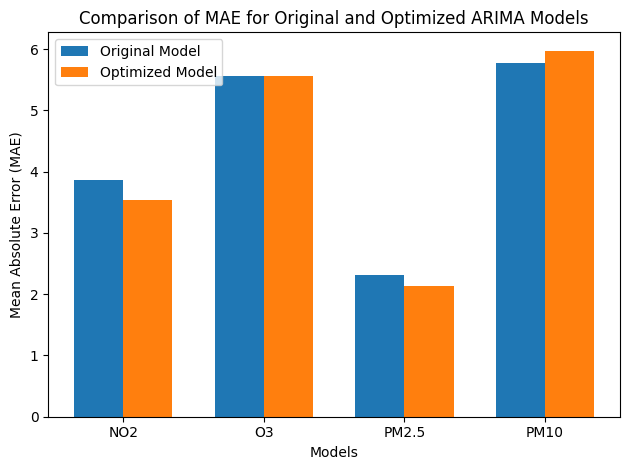

In [62]:
#Comparision between original And Optimal values for MAE scores

import matplotlib.pyplot as plt

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mae = [mae_no2, mae_o3, mae_pm25, mae_pm10]
optimized_mae = [optimized_mae_no2, optimized_mae_o3, optimized_mae_pm25, optimized_mae_pm10]

bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mae, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mae, bar_width, label='Optimized Model')

# Next I am Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison of MAE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


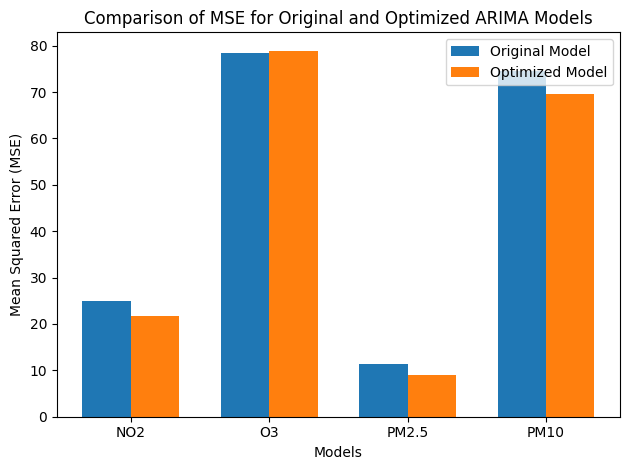

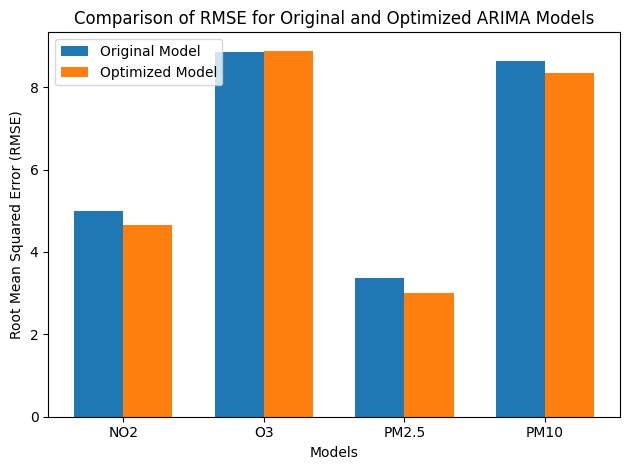

In [63]:
#Similarly I am doing this for MSE and RMSE

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mse = [mse_no2, mse_o3, mse_pm25, mse_pm10]
optimized_mse = [optimized_mse_no2, optimized_mse_o3, optimized_mse_pm25, optimized_mse_pm10]


bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of MSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


original_rmse = [rmse_no2, rmse_o3, rmse_pm25, rmse_pm10]
optimized_rmse = [optimized_rmse_no2, optimized_rmse_o3, optimized_rmse_pm25, optimized_rmse_pm10]


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_rmse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_rmse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax.set_title('Comparison of RMSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


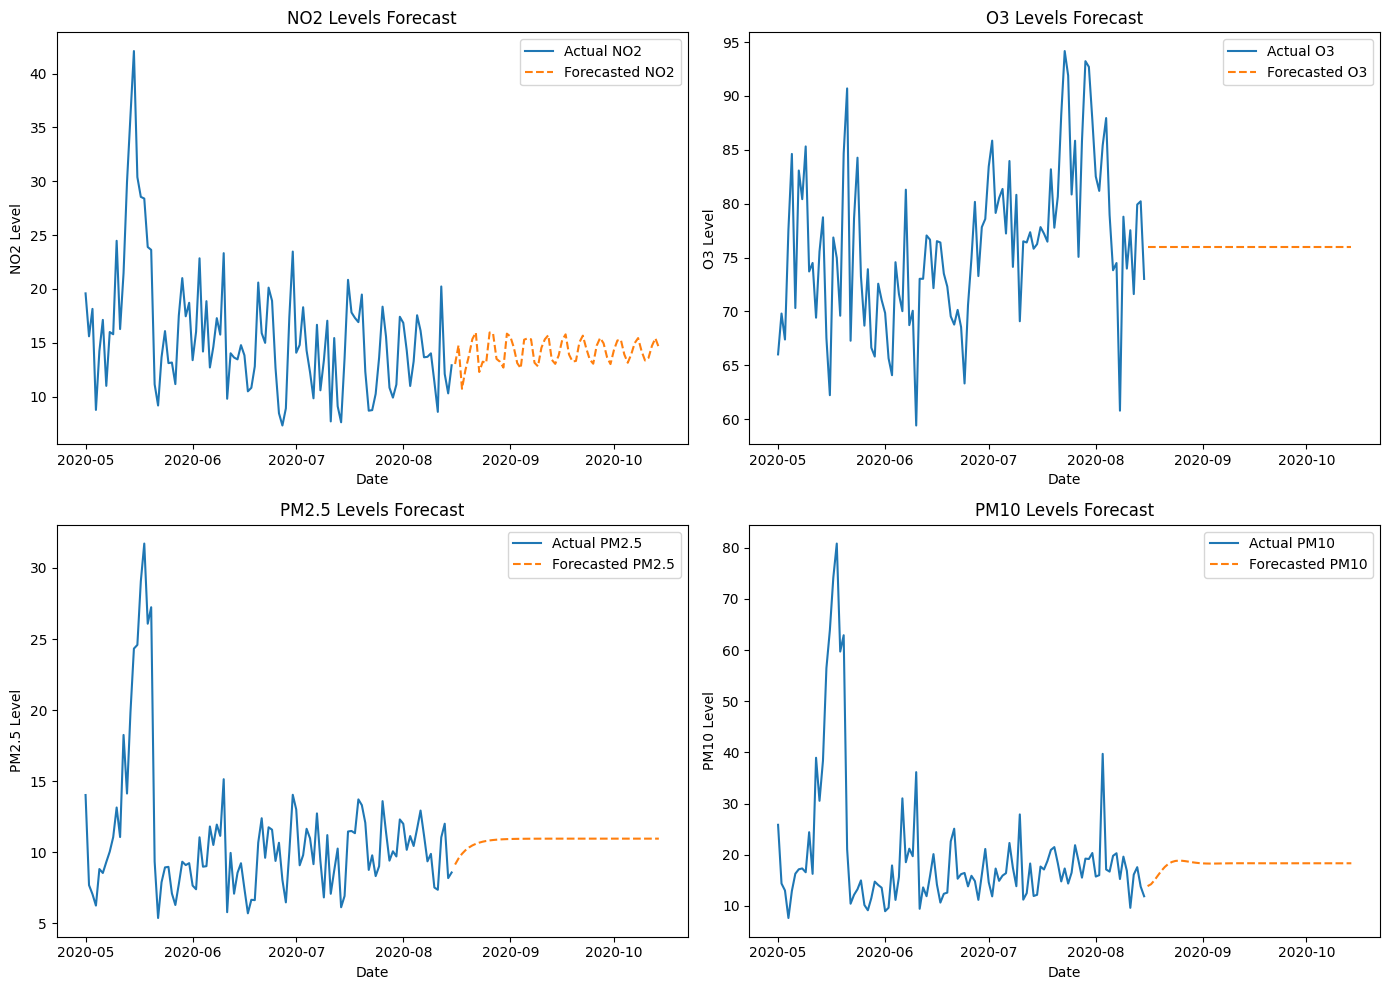

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# NO2
plt.subplot(2, 2, 1)
plt.plot(no2_data, label='Actual NO2')
plt.plot(forecast_no2_optimized.index, forecast_no2_optimized, label='Forecasted NO2', linestyle='--')
plt.title('NO2 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

# O3
plt.subplot(2, 2, 2)
plt.plot(o3_data, label='Actual O3')
plt.plot(forecast_o3_optimized.index, forecast_o3_optimized, label='Forecasted O3', linestyle='--')
plt.title('O3 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()

# PM2.5
plt.subplot(2, 2, 3)
plt.plot(pm25_data, label='Actual PM2.5')
plt.plot(forecast_pm25_optimized.index, forecast_pm25_optimized, label='Forecasted PM2.5', linestyle='--')
plt.title('PM2.5 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()

# PM10
plt.subplot(2, 2, 4)
plt.plot(pm10_data, label='Actual PM10')
plt.plot(forecast_pm10_optimized.index, forecast_pm10_optimized, label='Forecasted PM10', linestyle='--')
plt.title('PM10 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.legend()

plt.tight_layout()
plt.show()


##INTERPRETATION

The NO2 model has relatively low AIC and BIC values, suggesting a **Good** **fit** with a balance between accuracy and complexity. The MAE and RMSE values are moderate, indicating **Decent** predictive accuracy.

The O3 model has the highest AIC and BIC values, indicating it might be the **least well-fitted model** among the four. The higher MAE, MSE, and RMSE values suggest this model has larger errors and is **Less accurate** in its predictions compared to the other models.

The PM2.5 model has the **Lowest** AIC and BIC values, indicating it is likely the **Best-fitting model** among the four. The **Lowest** MAE, MSE, and RMSE values also suggest it has the highest predictive accuracy.

The PM10 model has **Higher** AIC and BIC values compared to the NO2 and PM2.5 models but lower than the O3 model. The MAE, MSE, and RMSE values are moderate, suggesting it **performs better than the O3 model** but not as well as the PM2.5 and NO2 models.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.7 MB/s eta 0:00:00

Training and evaluating model for NO2...
RMSE for NO2: 10.643877191651185
MSE for NO2: 113.29212167095234
MAE for NO2: 7.004310396492304


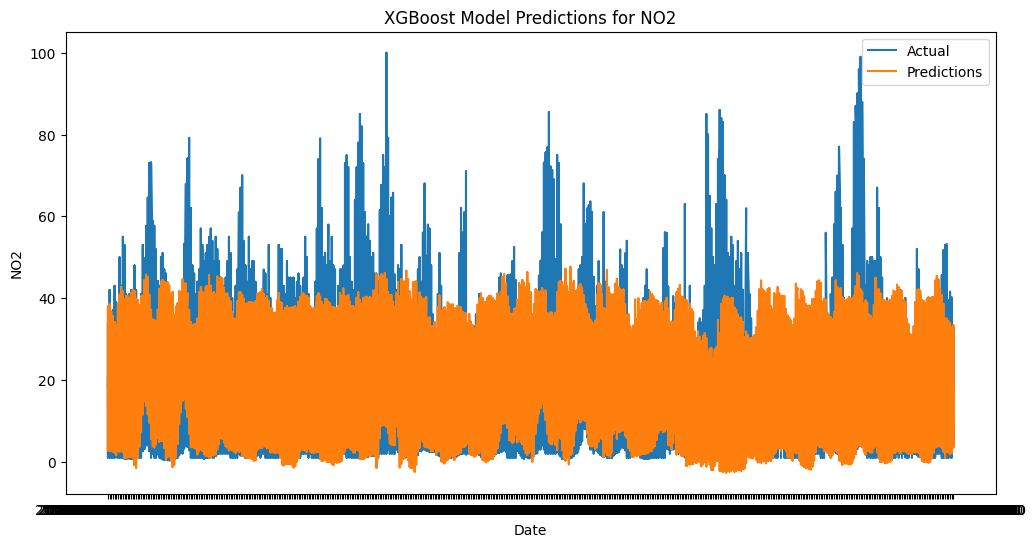


Training and evaluating model for O3...
RMSE for O3: 17.264279174023955
MSE for O3: 298.0553353986373
MAE for O3: 12.894058143897558


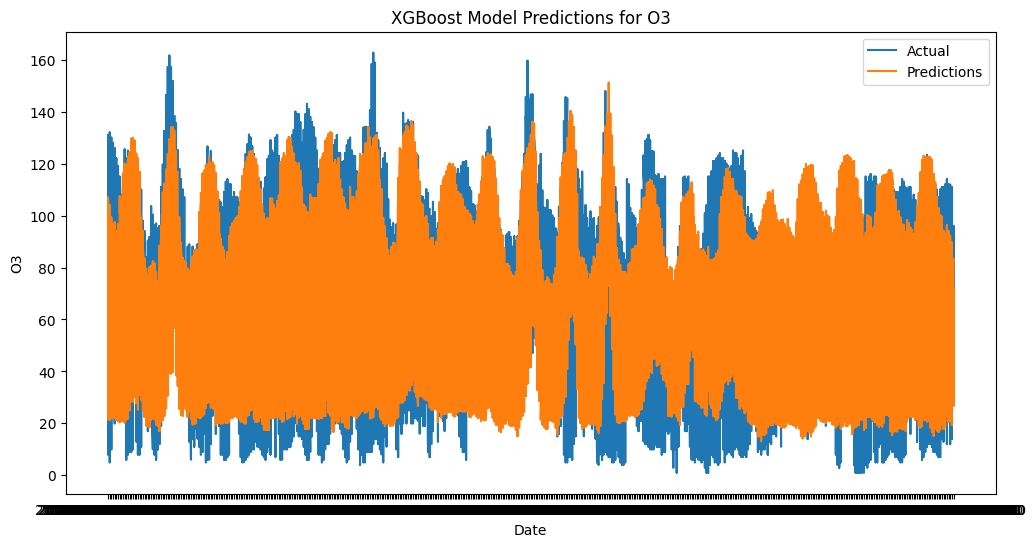


Training and evaluating model for PM10...
RMSE for PM10: 13.987269092830608
MSE for PM10: 195.6436966752544
MAE for PM10: 6.79814565940021


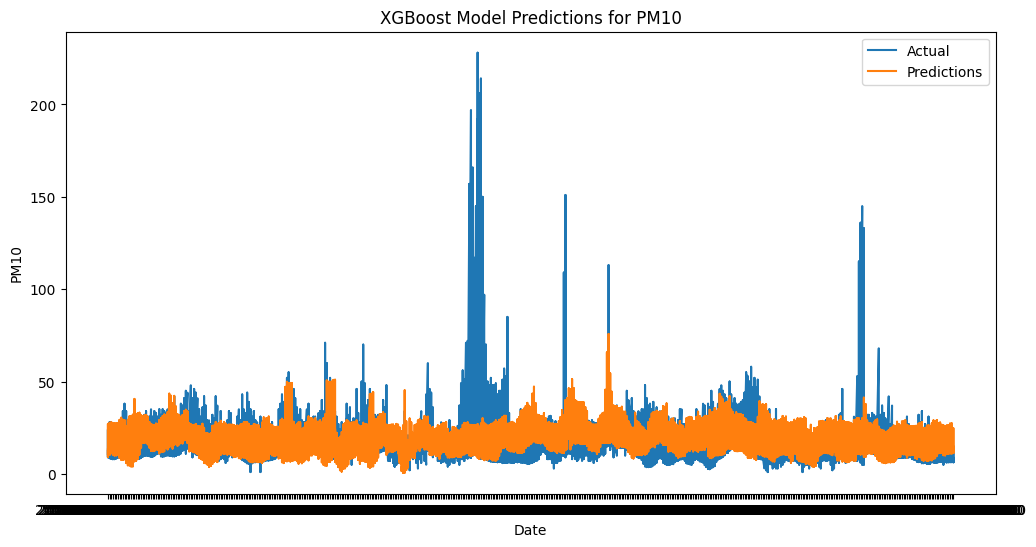


Training and evaluating model for PM2.5...
RMSE for PM2.5: 4.232805678919422
MSE for PM2.5: 17.916643915492507
MAE for PM2.5: 3.0513404478493578


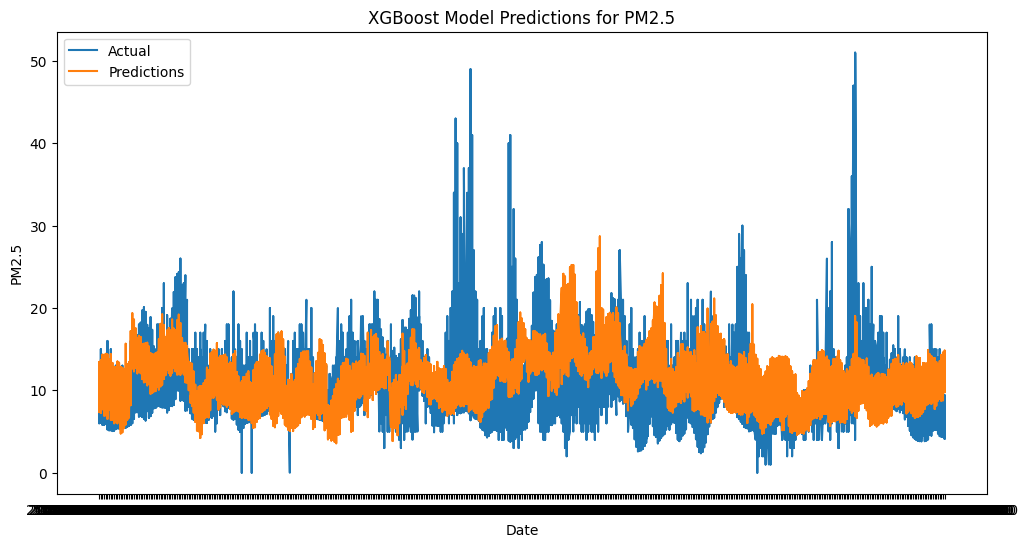

In [65]:
# Ensure xgboost is installed
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Load the dataset
data = pd.read_csv('C://Users//shlok//Desktop//first year//Second Semester//Introduction to Artificial Intelligence- Bhavik Gandhi//CleanData_Project.csv')

# Sort the dataset by Date
data_sorted = data.sort_values(by='Date', ascending=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extract features and target columns
features = ['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']
target_columns = ['NO2', 'O3', 'PM10', 'PM2.5']

# Train and evaluate the XGBoost model for each target column
for target in target_columns:
    print(f"\nTraining and evaluating model for {target}...")

    # Prepare the training and testing data
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialize and train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'RMSE for {target}: {rmse}')
    print(f'MSE for {target}: {mse}')
    print(f'MAE for {target}: {mae}')

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'], y_test, label='Actual')
    plt.plot(test_data['Date'], predictions, label='Predictions')
    plt.title(f'XGBoost Model Predictions for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()



Training and evaluating LSTM model for NO2...
Epoch 1/50
6730/6730 [==============================] - 30s 4ms/step - loss: 193.1452
Epoch 2/50
6730/6730 [==============================] - 29s 4ms/step - loss: 181.7787
Epoch 3/50
6730/6730 [==============================] - 29s 4ms/step - loss: 178.4517
Epoch 4/50
6730/6730 [==============================] - 29s 4ms/step - loss: 176.7799
Epoch 5/50
6730/6730 [==============================] - 29s 4ms/step - loss: 175.2074
Epoch 6/50
6730/6730 [==============================] - 27s 4ms/step - loss: 173.6969
Epoch 7/50
6730/6730 [==============================] - 27s 4ms/step - loss: 172.5103
Epoch 8/50
6730/6730 [==============================] - 26s 4ms/step - loss: 171.4448
Epoch 9/50
6730/6730 [==============================] - 27s 4ms/step - loss: 170.3098
Epoch 10/50
6730/6730 [==============================] - 29s 4ms/step - loss: 169.6885
Epoch 11/50
6730/6730 [==============================] - 30s 4ms/step - loss: 169.0445
Epoch

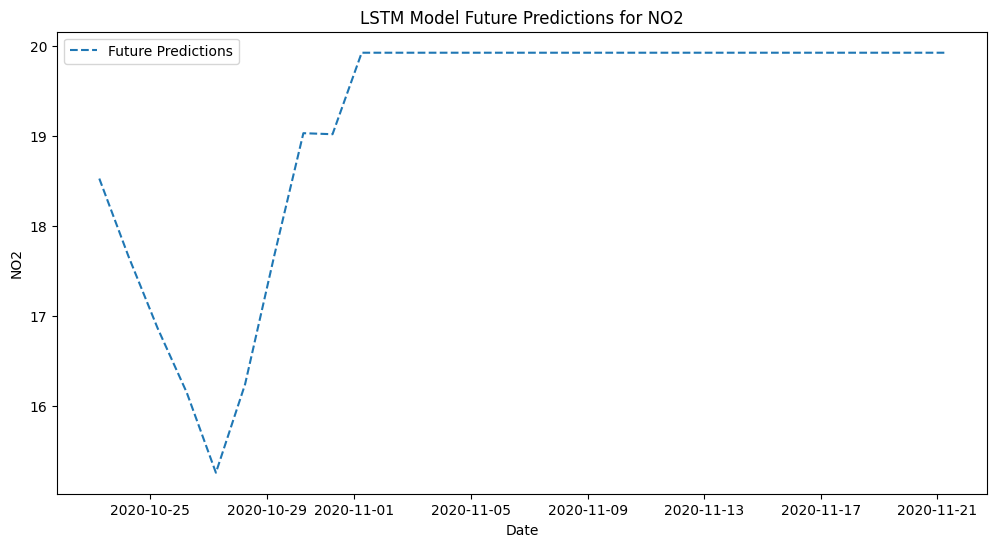


Training and evaluating LSTM model for O3...
Epoch 1/50
6730/6730 [==============================] - 29s 4ms/step - loss: 875.1138
Epoch 2/50
6730/6730 [==============================] - 28s 4ms/step - loss: 802.5910
Epoch 3/50
6730/6730 [==============================] - 28s 4ms/step - loss: 793.0063
Epoch 4/50
6730/6730 [==============================] - 28s 4ms/step - loss: 788.5153
Epoch 5/50
6730/6730 [==============================] - 27s 4ms/step - loss: 784.8956
Epoch 6/50
6730/6730 [==============================] - 28s 4ms/step - loss: 781.5699
Epoch 7/50
6730/6730 [==============================] - 30s 4ms/step - loss: 779.6249
Epoch 8/50
6730/6730 [==============================] - 29s 4ms/step - loss: 777.6354
Epoch 9/50
6730/6730 [==============================] - 29s 4ms/step - loss: 775.8773
Epoch 10/50
6730/6730 [==============================] - 26s 4ms/step - loss: 774.0660
Epoch 11/50
6730/6730 [==============================] - 26s 4ms/step - loss: 774.0257
Epoch 

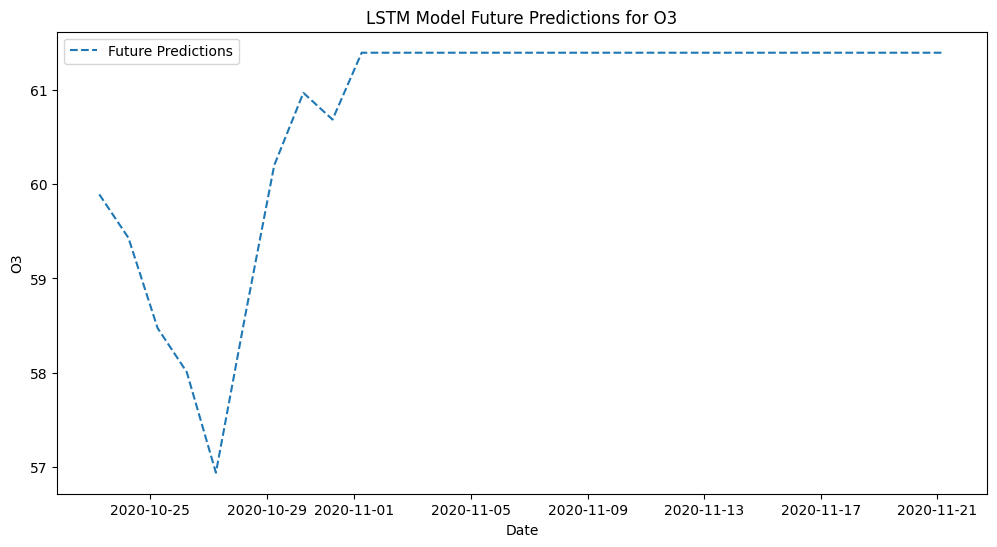


Training and evaluating LSTM model for PM10...
Epoch 1/50
6730/6730 [==============================] - 29s 4ms/step - loss: 206.5750
Epoch 2/50
6730/6730 [==============================] - 30s 4ms/step - loss: 184.8994
Epoch 3/50
6730/6730 [==============================] - 29s 4ms/step - loss: 169.3207
Epoch 4/50
6730/6730 [==============================] - 29s 4ms/step - loss: 163.8397
Epoch 5/50
6730/6730 [==============================] - 29s 4ms/step - loss: 155.0761
Epoch 6/50
6730/6730 [==============================] - 29s 4ms/step - loss: 149.1614
Epoch 7/50
6730/6730 [==============================] - 29s 4ms/step - loss: 144.3996
Epoch 8/50
6730/6730 [==============================] - 29s 4ms/step - loss: 141.2518
Epoch 9/50
6730/6730 [==============================] - 28s 4ms/step - loss: 138.7159
Epoch 10/50
6730/6730 [==============================] - 28s 4ms/step - loss: 136.1762
Epoch 11/50
6730/6730 [==============================] - 28s 4ms/step - loss: 133.8589
Epoc

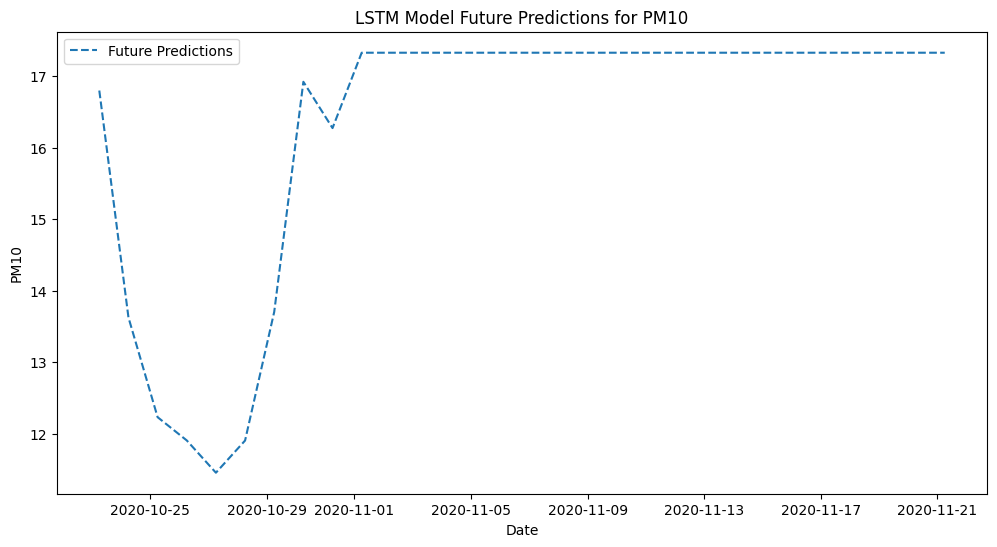


Training and evaluating LSTM model for PM2.5...
Epoch 1/50
6730/6730 [==============================] - 30s 4ms/step - loss: 32.4940
Epoch 2/50
6730/6730 [==============================] - 29s 4ms/step - loss: 28.4951
Epoch 3/50
6730/6730 [==============================] - 29s 4ms/step - loss: 27.0934
Epoch 4/50
6730/6730 [==============================] - 28s 4ms/step - loss: 26.0359
Epoch 5/50
6730/6730 [==============================] - 28s 4ms/step - loss: 25.0802
Epoch 6/50
6730/6730 [==============================] - 29s 4ms/step - loss: 24.4208
Epoch 7/50
6730/6730 [==============================] - 29s 4ms/step - loss: 23.7379
Epoch 8/50
6730/6730 [==============================] - 29s 4ms/step - loss: 23.3698
Epoch 9/50
6730/6730 [==============================] - 27s 4ms/step - loss: 22.9900
Epoch 10/50
6730/6730 [==============================] - 25s 4ms/step - loss: 22.6339
Epoch 11/50
6730/6730 [==============================] - 25s 4ms/step - loss: 22.3949
Epoch 12/50
67

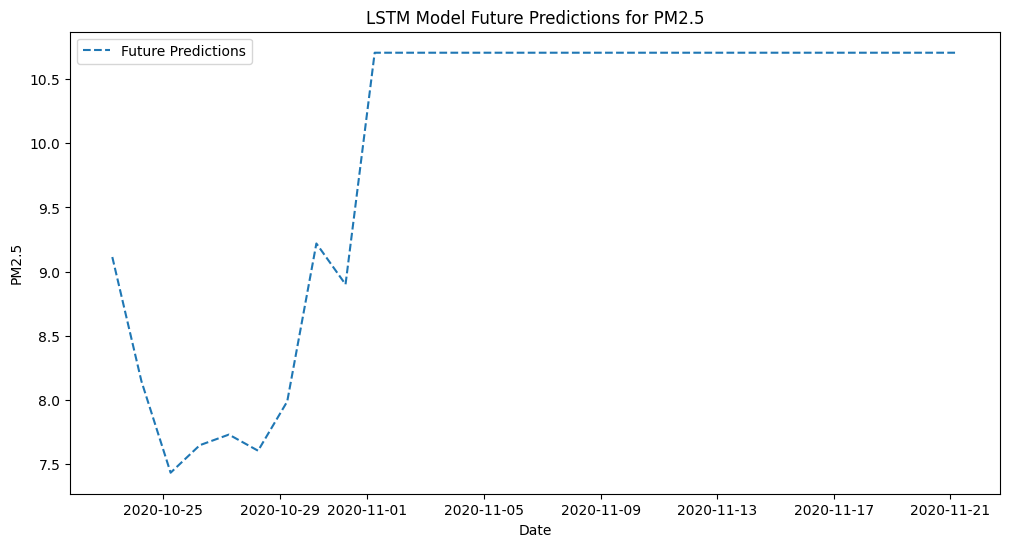

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/aqi_data.csv')

# Sort the dataset by Date
data_sorted = data.sort_values(by='Date', ascending=True)

# Select the features and target columns
features = ['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']
target_columns = ['NO2', 'O3', 'PM10', 'PM2.5']

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_sorted[features])

# Function to create sequences
def create_sequences(data, target, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append((data[i:i + window_size], target[i + window_size]))
    return sequences

window_size = 10
lstm_data = []
for target in target_columns:
    sequences = create_sequences(scaled_features, data_sorted[target].values, window_size)
    lstm_data.append(sequences)

# Split the data into training and testing sets for LSTM
lstm_train_data = []
lstm_test_data = []
for sequences in lstm_data:
    train_size = int(len(sequences) * 0.8)
    lstm_train_data.append(sequences[:train_size])
    lstm_test_data.append(sequences[train_size:])

# Function to split sequences into X and y
def split_sequences(sequences):
    X, y = zip(*sequences)
    return np.array(X), np.array(y)

# Build and train the LSTM model, then predict the next 30 days
for target, train_sequences, test_sequences in zip(target_columns, lstm_train_data, lstm_test_data):
    print(f"\nTraining and evaluating LSTM model for {target}...")

    X_train, y_train = split_sequences(train_sequences)
    X_test, y_test = split_sequences(test_sequences)

    # Reshape the data to [samples, time steps, features] for LSTM
    X_train = X_train.reshape((X_train.shape[0], window_size, len(features)))
    X_test = X_test.reshape((X_test.shape[0], window_size, len(features)))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, len(features))))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'RMSE for {target}: {rmse}')
    print(f'MSE for {target}: {mse}')
    print(f'MAE for {target}: {mae}')

    # Predict the next 30 days
    future_predictions = []
    last_window = scaled_features[-window_size:]

    for _ in range(30):
        prediction = model.predict(last_window.reshape((1, window_size, len(features))))
        future_predictions.append(prediction[0][0])
        # Remove the first row and append the new prediction at the end
        new_data = scaler.transform([[data_sorted[feature].iloc[-1] for feature in features]])
        last_window = np.roll(last_window, -1, axis=0)
        last_window[-1] = new_data[0]

    future_predictions = np.array(future_predictions)

    # Plot the future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(pd.date_range(start=data_sorted['Date'].iloc[-1], periods=30, freq='D'), future_predictions, label='Future Predictions', linestyle='dashed')
    plt.title(f'LSTM Model Future Predictions for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()



Training and evaluating LSTM model for NO2...
Epoch 1/10
6730/6730 [==============================] - 28s 4ms/step - loss: 192.2509
Epoch 2/10
6730/6730 [==============================] - 28s 4ms/step - loss: 181.5343
Epoch 3/10
6730/6730 [==============================] - 30s 4ms/step - loss: 178.7810
Epoch 4/10
6730/6730 [==============================] - 27s 4ms/step - loss: 176.7022
Epoch 5/10
6730/6730 [==============================] - 27s 4ms/step - loss: 174.9113
Epoch 6/10
6730/6730 [==============================] - 29s 4ms/step - loss: 173.4606
Epoch 7/10
6730/6730 [==============================] - 28s 4ms/step - loss: 172.2995
Epoch 8/10
6730/6730 [==============================] - 30s 4ms/step - loss: 171.5266
Epoch 9/10
6730/6730 [==============================] - 29s 4ms/step - loss: 171.0824
Epoch 10/10
1683/1683 [==============================] - 4s 2ms/step
RMSE for NO2: 13.366351977319718
MSE for NO2: 178.65936518159876
MAE for NO2: 9.75433297866908
1/1 [==========

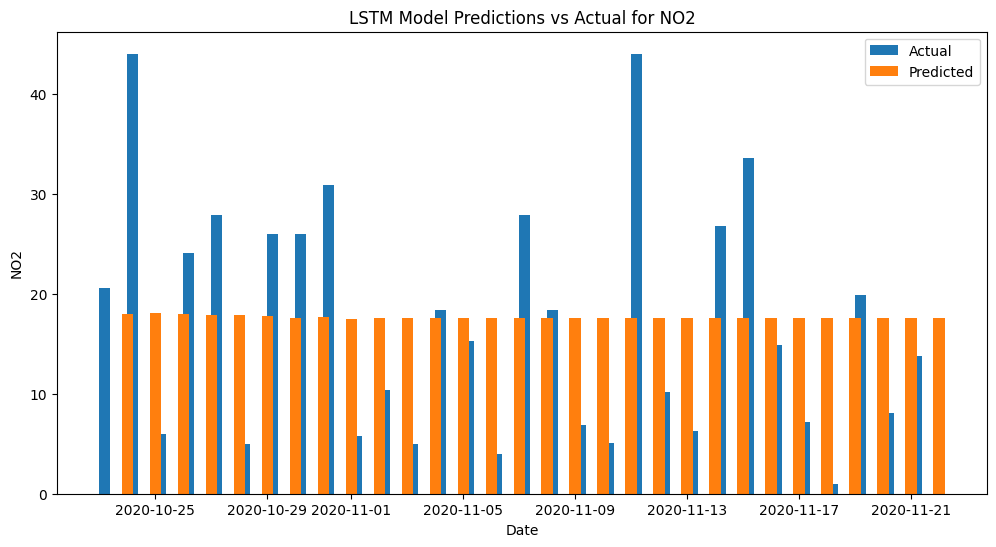


Training and evaluating LSTM model for O3...
Epoch 1/10
6730/6730 [==============================] - 28s 4ms/step - loss: 873.3083
Epoch 2/10
6730/6730 [==============================] - 28s 4ms/step - loss: 807.1956
Epoch 3/10
6730/6730 [==============================] - 27s 4ms/step - loss: 794.9649
Epoch 4/10
6730/6730 [==============================] - 28s 4ms/step - loss: 788.2152
Epoch 5/10
6730/6730 [==============================] - 28s 4ms/step - loss: 784.2380
Epoch 6/10
6730/6730 [==============================] - 27s 4ms/step - loss: 780.7889
Epoch 7/10
6730/6730 [==============================] - 28s 4ms/step - loss: 779.1608
Epoch 8/10
6730/6730 [==============================] - 26s 4ms/step - loss: 777.6157
Epoch 9/10
6730/6730 [==============================] - 26s 4ms/step - loss: 775.4202
Epoch 10/10
1683/1683 [==============================] - 4s 2ms/step
RMSE for O3: 25.579449461367975
MSE for O3: 654.3082347466784
MAE for O3: 18.537588417554495
1/1 [=============

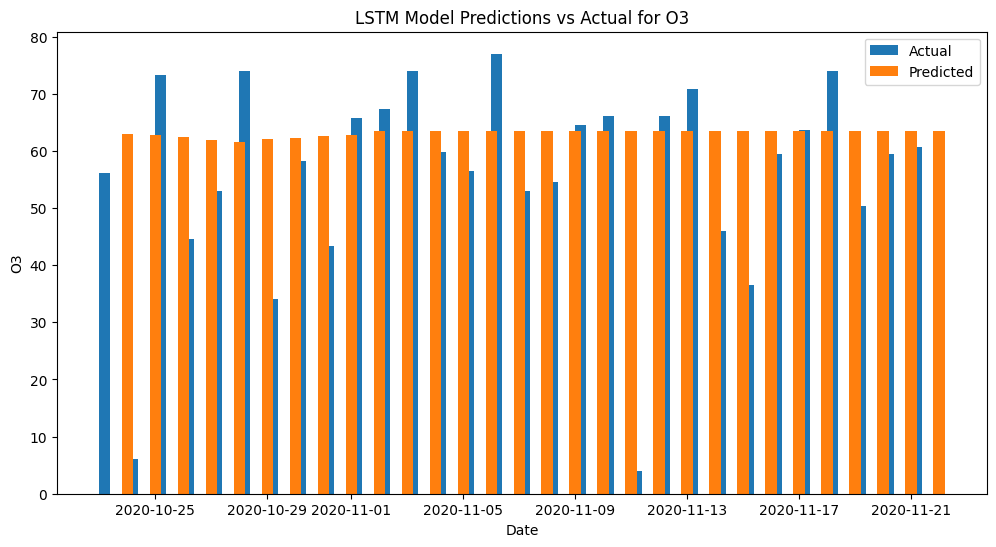


Training and evaluating LSTM model for PM10...
Epoch 1/10
6730/6730 [==============================] - 28s 4ms/step - loss: 199.6369
Epoch 2/10
6730/6730 [==============================] - 27s 4ms/step - loss: 175.6590
Epoch 3/10
6730/6730 [==============================] - 28s 4ms/step - loss: 165.2991
Epoch 4/10
6730/6730 [==============================] - 28s 4ms/step - loss: 157.8370
Epoch 5/10
6730/6730 [==============================] - 30s 4ms/step - loss: 152.0425
Epoch 6/10
6730/6730 [==============================] - 30s 4ms/step - loss: 147.6478
Epoch 7/10
6730/6730 [==============================] - 29s 4ms/step - loss: 144.5778
Epoch 8/10
6730/6730 [==============================] - 29s 4ms/step - loss: 141.7487
Epoch 9/10
6730/6730 [==============================] - 29s 4ms/step - loss: 139.5168
Epoch 10/10
1683/1683 [==============================] - 4s 2ms/step
RMSE for PM10: 23.009124505752506
MSE for PM10: 529.4198105212205
MAE for PM10: 15.391723451289456
1/1 [=====

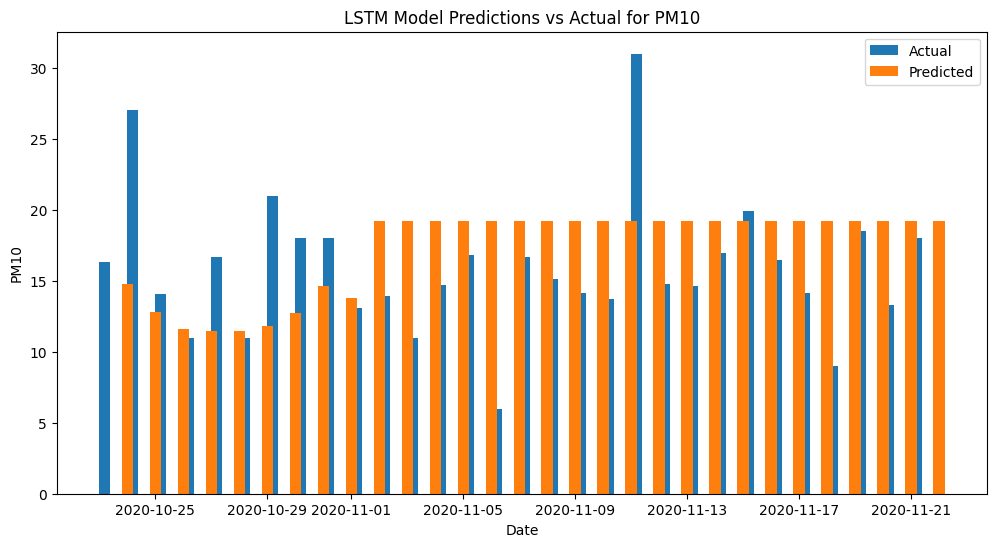


Training and evaluating LSTM model for PM2.5...
Epoch 1/10
6730/6730 [==============================] - 29s 4ms/step - loss: 33.3206
Epoch 2/10
6730/6730 [==============================] - 29s 4ms/step - loss: 28.7173
Epoch 3/10
6730/6730 [==============================] - 29s 4ms/step - loss: 26.9790
Epoch 4/10
6730/6730 [==============================] - 27s 4ms/step - loss: 25.8368
Epoch 5/10
6730/6730 [==============================] - 28s 4ms/step - loss: 24.9393
Epoch 6/10
6730/6730 [==============================] - 28s 4ms/step - loss: 24.2181
Epoch 7/10
6730/6730 [==============================] - 29s 4ms/step - loss: 23.5838
Epoch 8/10
6730/6730 [==============================] - 28s 4ms/step - loss: 23.1100
Epoch 9/10
6730/6730 [==============================] - 28s 4ms/step - loss: 22.7871
Epoch 10/10
1683/1683 [==============================] - 4s 2ms/step
RMSE for PM2.5: 9.16017722623422
MSE for PM2.5: 83.90884681602003
MAE for PM2.5: 6.137158447351777
1/1 [=============

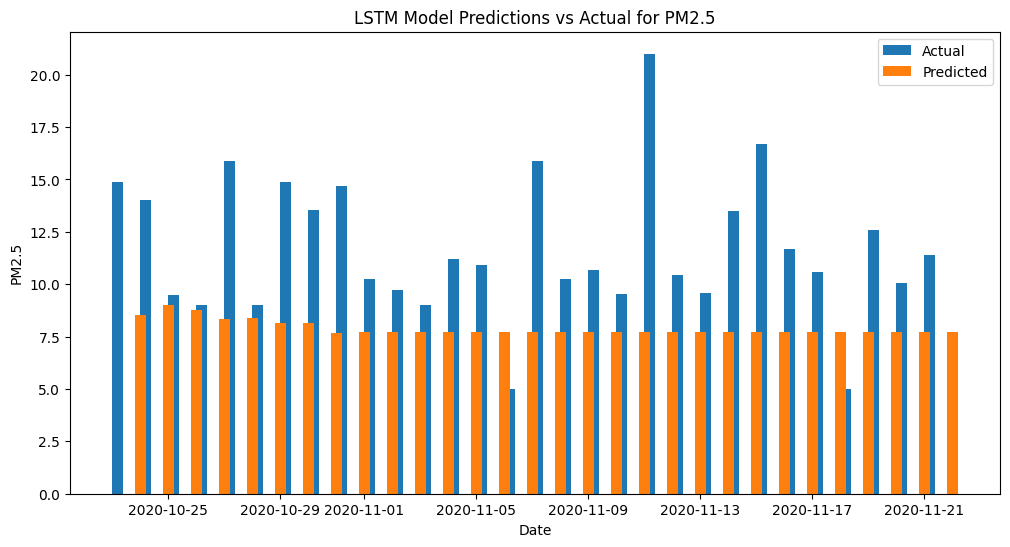

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/aqi_data.csv')

# Sort the dataset by Date
data_sorted = data.sort_values(by='Date', ascending=True)

# Select the features and target columns
features = ['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']
target_columns = ['NO2', 'O3', 'PM10', 'PM2.5']

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_sorted[features])

# Function to create sequences
def create_sequences(data, target, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append((data[i:i + window_size], target[i + window_size]))
    return sequences

window_size = 10
lstm_data = []
for target in target_columns:
    sequences = create_sequences(scaled_features, data_sorted[target].values, window_size)
    lstm_data.append(sequences)

# Split the data into training and testing sets for LSTM
lstm_train_data = []
lstm_test_data = []
for sequences in lstm_data:
    train_size = int(len(sequences) * 0.8)
    lstm_train_data.append(sequences[:train_size])
    lstm_test_data.append(sequences[train_size:])

# Function to split sequences into X and y
def split_sequences(sequences):
    X, y = zip(*sequences)
    return np.array(X), np.array(y)

# Build and train the LSTM model, then predict the next 30 days
for target, train_sequences, test_sequences in zip(target_columns, lstm_train_data, lstm_test_data):
    print(f"\nTraining and evaluating LSTM model for {target}...")

    X_train, y_train = split_sequences(train_sequences)
    X_test, y_test = split_sequences(test_sequences)

    # Reshape the data to [samples, time steps, features] for LSTM
    X_train = X_train.reshape((X_train.shape[0], window_size, len(features)))
    X_test = X_test.reshape((X_test.shape[0], window_size, len(features)))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, len(features))))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'RMSE for {target}: {rmse}')
    print(f'MSE for {target}: {mse}')
    print(f'MAE for {target}: {mae}')

    # Predict the next 30 days
    future_predictions = []
    last_window = scaled_features[-window_size:]

    for _ in range(30):
        prediction = model.predict(last_window.reshape((1, window_size, len(features))))
        future_predictions.append(prediction[0][0])
        # Remove the first row and append the new prediction at the end
        new_data = scaler.transform([[data_sorted[feature].iloc[-1] for feature in features]])
        last_window = np.roll(last_window, -1, axis=0)
        last_window[-1] = new_data[0]

    future_predictions = np.array(future_predictions)

    # Get the actual values for comparison (last 30 days of target column)
    actual_values = data_sorted[target].values[-30:]

    # Plot the actual vs predicted values
    dates = pd.date_range(start=data_sorted['Date'].iloc[-30], periods=30, freq='D')

    plt.figure(figsize=(12, 6))
    width = 0.4  # the width of the bars
    plt.bar(dates, actual_values, width=width, label='Actual', align='center')
    plt.bar(dates + pd.Timedelta(days=width*2), future_predictions, width=width, label='Predicted', align='center')
    plt.title(f'LSTM Model Predictions vs Actual for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()
